In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
df = pd.read_csv("UNSW_NB15.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [4]:
df = df.drop(['id'], axis=1)
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
6,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,...,1,40,0,0,0,1,39,0,Normal,0
7,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,...,1,40,0,0,0,3,39,0,Normal,0
8,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,...,1,40,0,0,0,3,39,0,Normal,0
9,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,...,1,40,0,0,0,3,39,0,Normal,0


In [5]:
print(len(df))

175341


In [6]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

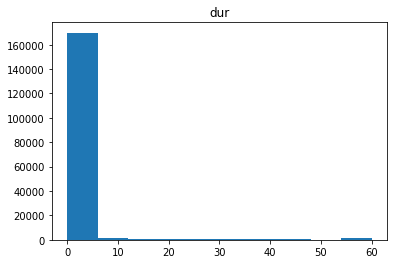

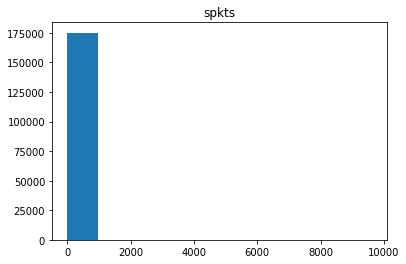

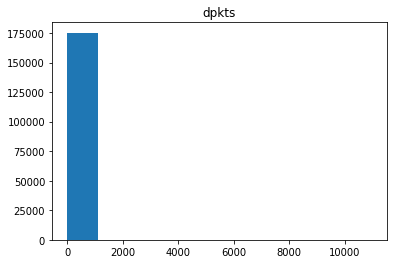

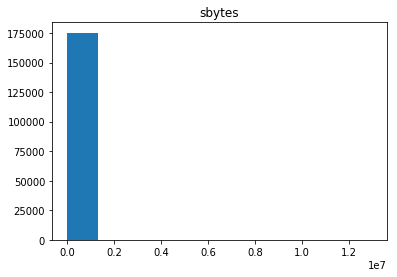

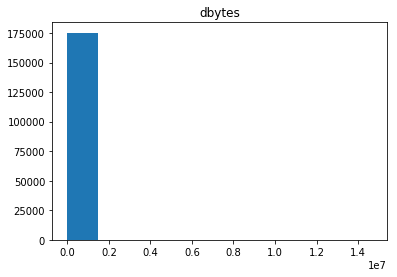

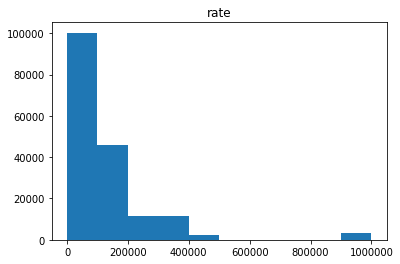

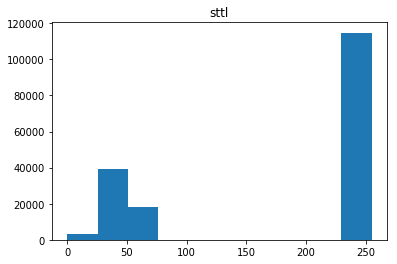

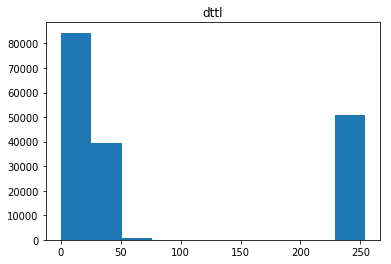

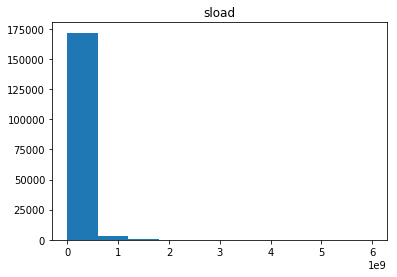

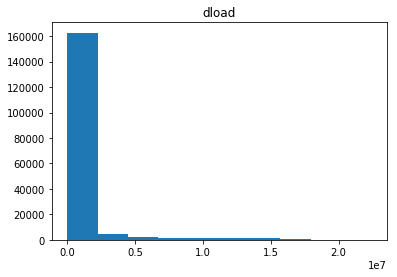

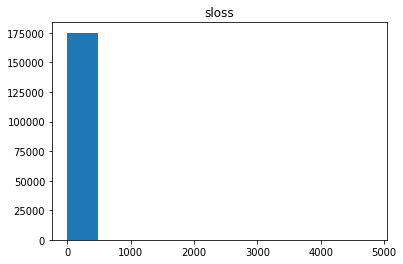

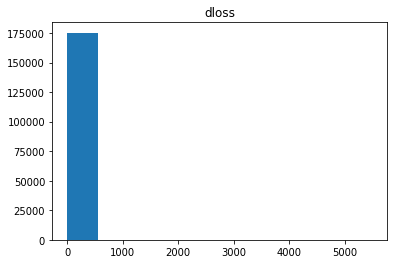

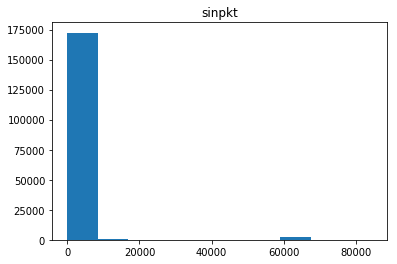

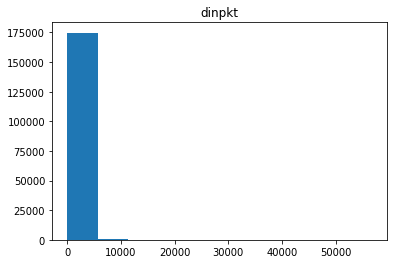

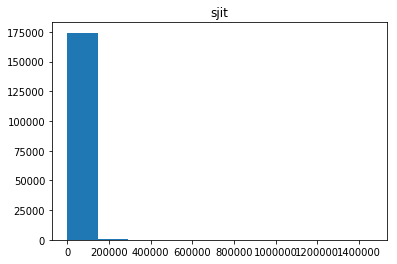

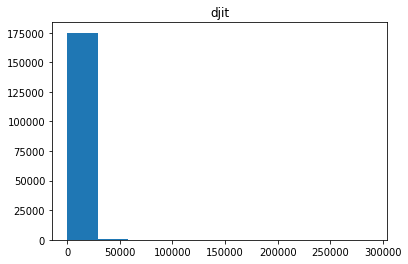

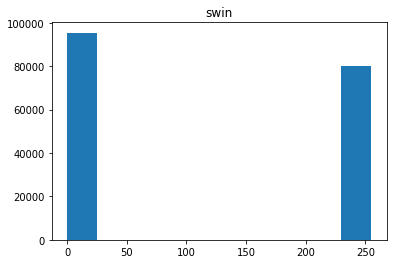

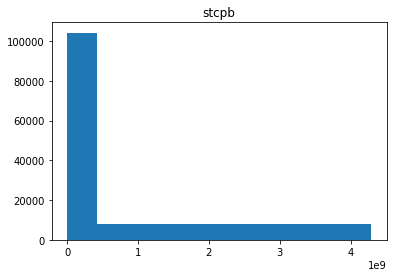

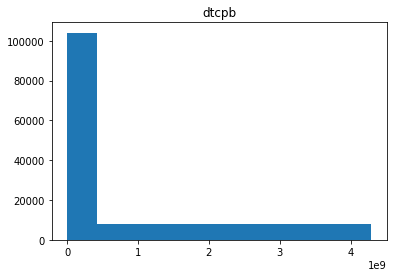

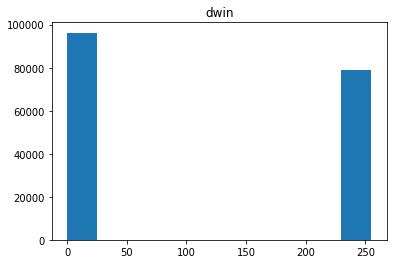

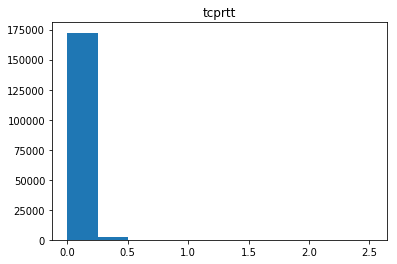

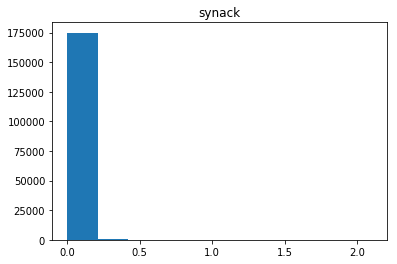

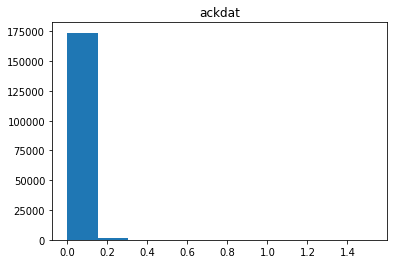

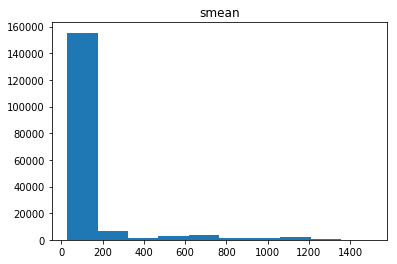

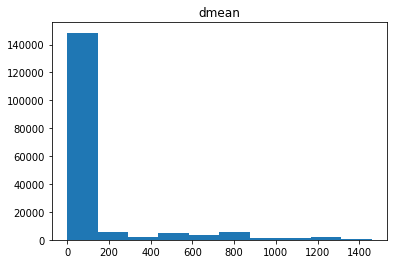

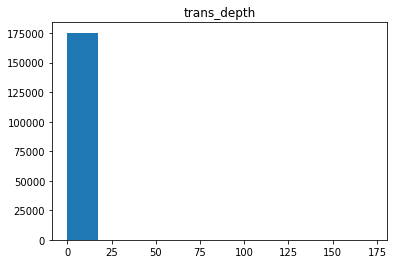

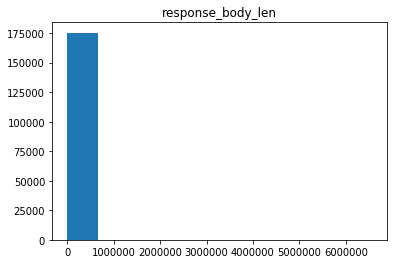

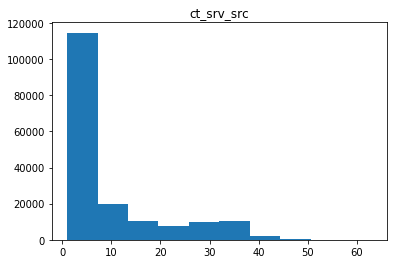

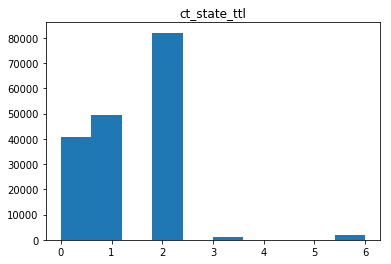

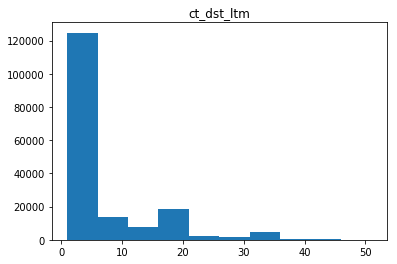

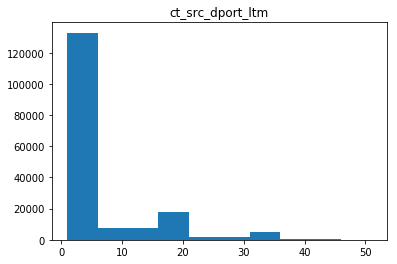

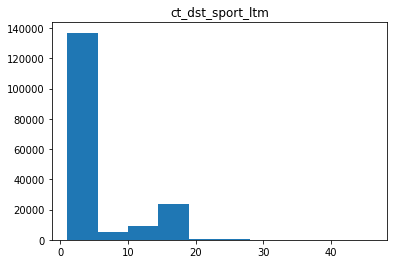

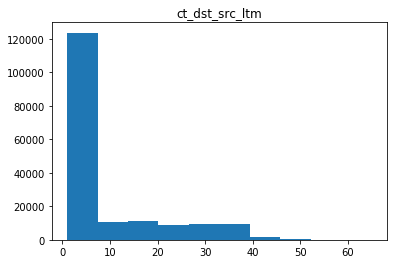

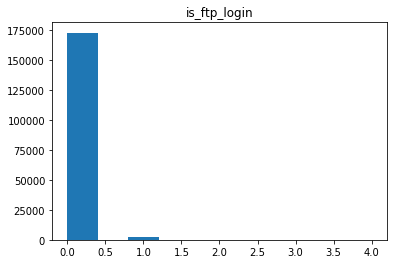

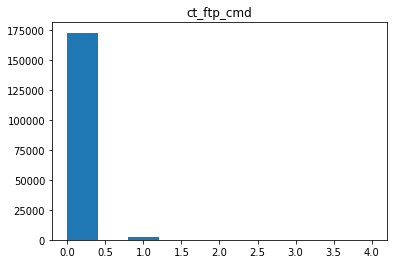

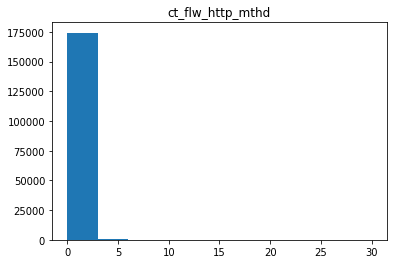

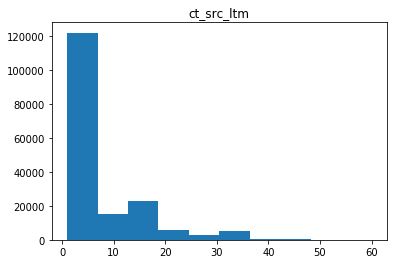

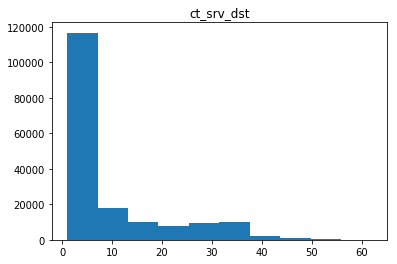

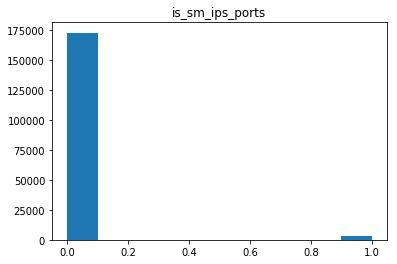

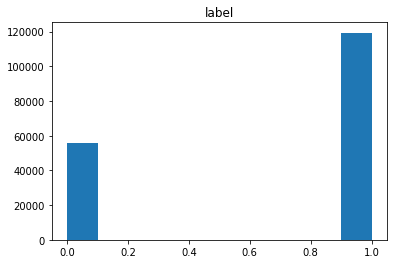

In [7]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [8]:
## 0 for normal and 1 for attack records

labels = df['label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df['label']==lb))
    print(lb,",",sum(df['label']==lb))

0 , 56000
1 , 119341


In [9]:
## 'is_sm_ips_ports': If source (1) and destination (3)IP addresses equal and port numbers (2)(4) equal then, this variable takes value 1 else 0

cn = 'is_sm_ips_ports'
attrs = df[cn].unique()
attr_count = []
for att in attrs:
    if sum(df[cn]==att)>100:
        attr_count.append(sum(df[cn]==att))
        print(att,",",sum(df[cn]==att))

0 , 172579
1 , 2762


In [10]:
## 'ct_src_dport_ltm': No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26)

cn = 'ct_src_dport_ltm'
attrs = df[cn].unique()
attr_count = []
for att in attrs:
    if sum(df[cn]==att)>100:
        attr_count.append(sum(df[cn]==att))
        print(att,",",sum(df[cn]==att))

1 , 92793
2 , 24949
3 , 9322
6 , 2011
10 , 1564
5 , 1825
8 , 1738
9 , 1267
7 , 1159
4 , 4006
11 , 1284
14 , 1719
13 , 1525
15 , 1313
12 , 1541
21 , 306
17 , 6325
18 , 2566
23 , 344
16 , 8458
20 , 361
25 , 424
19 , 292
33 , 2612
22 , 257
31 , 323
27 , 395
34 , 1329
28 , 402
26 , 271
32 , 659
29 , 351
30 , 375
24 , 370
36 , 175
41 , 123


## Classification
### Binary (attack/benign)

In [11]:
import torch

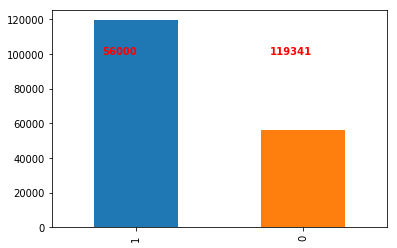

In [12]:
ax = df['label'].value_counts().plot(kind='bar')
for i in range(len(labels)):
    ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

In [13]:
df_b = df[(df['label']==0)]
df_b

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
6,0.637109,tcp,-,FIN,10,8,534,354,26.683033,254,...,1,40,0,0,0,1,39,0,Normal,0
7,0.521584,tcp,-,FIN,10,8,534,354,32.593026,254,...,1,40,0,0,0,3,39,0,Normal,0
8,0.542905,tcp,-,FIN,10,8,534,354,31.313031,254,...,1,40,0,0,0,3,39,0,Normal,0
9,0.258687,tcp,-,FIN,10,6,534,268,57.985135,254,...,1,40,0,0,0,3,39,0,Normal,0


In [14]:
df_a = df[(df['label']==1)]
df_a = df_a[:56000]
df_a

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,0.000009,ddp,-,INT,2,0,200,0,1.111111e+05,254,...,1,4,0,0,0,2,4,0,Backdoor,1
47912,0.000009,ipv6-frag,-,INT,2,0,200,0,1.111111e+05,254,...,2,7,0,0,0,2,7,0,Backdoor,1
47913,0.000009,cftp,-,INT,2,0,200,0,1.111111e+05,254,...,1,6,0,0,0,1,6,0,Backdoor,1
47914,0.000003,wsn,-,INT,2,0,200,0,3.333333e+05,254,...,2,7,0,0,0,2,6,0,Backdoor,1
47915,0.000008,pvp,-,INT,2,0,200,0,1.250000e+05,254,...,1,4,0,0,0,11,4,0,Backdoor,1
47916,0.000005,wb-expak,-,INT,2,0,200,0,2.000000e+05,254,...,2,4,0,0,0,19,3,0,Backdoor,1
47917,0.000008,mtp,-,INT,2,0,200,0,1.250000e+05,254,...,2,6,0,0,0,11,6,0,Backdoor,1
47918,0.000005,pri-enc,-,INT,2,0,200,0,2.000000e+05,254,...,1,5,0,0,0,9,5,0,Backdoor,1
47919,0.000008,sat-mon,-,INT,2,0,200,0,1.250000e+05,254,...,2,7,0,0,0,2,6,0,Backdoor,1
47920,0.000002,cphb,-,INT,2,0,200,0,5.000000e+05,254,...,2,7,0,0,0,2,6,0,Backdoor,1


In [15]:
sameratio = pd.concat([df_a, df_b], axis=0)
sameratio.reset_index(inplace=True)
sameratio

,index,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,47911,0.000009,ddp,-,INT,2,0,200,0,111111.107200,...,1,4,0,0,0,2,4,0,Backdoor,1
1,47912,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.107200,...,2,7,0,0,0,2,7,0,Backdoor,1
2,47913,0.000009,cftp,-,INT,2,0,200,0,111111.107200,...,1,6,0,0,0,1,6,0,Backdoor,1
3,47914,0.000003,wsn,-,INT,2,0,200,0,333333.321500,...,2,7,0,0,0,2,6,0,Backdoor,1
4,47915,0.000008,pvp,-,INT,2,0,200,0,125000.000300,...,1,4,0,0,0,11,4,0,Backdoor,1
5,47916,0.000005,wb-expak,-,INT,2,0,200,0,200000.005100,...,2,4,0,0,0,19,3,0,Backdoor,1
6,47917,0.000008,mtp,-,INT,2,0,200,0,125000.000300,...,2,6,0,0,0,11,6,0,Backdoor,1
7,47918,0.000005,pri-enc,-,INT,2,0,200,0,200000.005100,...,1,5,0,0,0,9,5,0,Backdoor,1
8,47919,0.000008,sat-mon,-,INT,2,0,200,0,125000.000300,...,2,7,0,0,0,2,6,0,Backdoor,1
9,47920,0.000002,cphb,-,INT,2,0,200,0,500000.001300,...,2,7,0,0,0,2,6,0,Backdoor,1


#### anomaly, benign 비율 맞춘 데이터셋 완료
- benign은 0, attack은 1

In [16]:
sameratio2 = sameratio[['rate', 'sttl', 'dttl', 'swin', 'dtcpb', 'smean', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_src_ltm', 'ct_srv_dst', 'label']]
sameratio2

,rate,sttl,dttl,swin,dtcpb,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_src_ltm,ct_srv_dst,label
0,111111.107200,254,0,0,0,100,0,4,2,1,1,1,4,0,0,2,4,1
1,111111.107200,254,0,0,0,100,0,7,2,2,2,2,7,0,0,2,7,1
2,111111.107200,254,0,0,0,100,0,6,2,1,1,1,6,0,0,1,6,1
3,333333.321500,254,0,0,0,100,0,6,2,2,2,2,7,0,0,2,6,1
4,125000.000300,254,0,0,0,100,0,4,2,1,1,1,4,0,0,11,4,1
5,200000.005100,254,0,0,0,100,0,3,2,2,2,2,4,0,0,19,3,1
6,125000.000300,254,0,0,0,100,0,6,2,2,2,2,6,0,0,11,6,1
7,200000.005100,254,0,0,0,100,0,5,2,2,1,1,5,0,0,9,5,1
8,125000.000300,254,0,0,0,100,0,6,2,2,2,2,7,0,0,2,6,1
9,500000.001300,254,0,0,0,100,0,6,2,2,2,2,7,0,0,2,6,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(sameratio2)
print(scaled)

[[1.11111107e-01 9.96078431e-01 0.00000000e+00 ... 1.69491525e-02
  4.91803279e-02 1.00000000e+00]
 [1.11111107e-01 9.96078431e-01 0.00000000e+00 ... 1.69491525e-02
  9.83606557e-02 1.00000000e+00]
 [1.11111107e-01 9.96078431e-01 0.00000000e+00 ... 0.00000000e+00
  8.19672131e-02 1.00000000e+00]
 ...
 [1.66679999e-08 0.00000000e+00 0.00000000e+00 ... 1.69491525e-02
  1.63934426e-02 0.00000000e+00]
 [1.66679999e-08 0.00000000e+00 0.00000000e+00 ... 1.69491525e-02
  1.63934426e-02 0.00000000e+00]
 [1.66679999e-08 0.00000000e+00 0.00000000e+00 ... 1.69491525e-02
  1.63934426e-02 0.00000000e+00]]


In [18]:
X = scaled[:, :-1]
y = scaled[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

In [19]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(71680, 17) (71680,)
(17920, 17) (17920,)
(22400, 17) (22400,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_val, y_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X_test, y_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 89.96
KNN test 정확도 : 89.83


In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree  = round(decision_tree.score(X_val, y_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X_test, y_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 92.63
decision tree test 정확도 : 92.93


In [22]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
acc_logistic_reg  = round(logistic_reg.score(X_val, y_val)*100, 2)
print('logistic regression validation 정확도 :', acc_logistic_reg)
acc_logistic_reg  = round(logistic_reg.score(X_test, y_test)*100, 2)
print('logistic regression test 정확도 :', acc_logistic_reg)

logistic regression validation 정확도 : 87.41
logistic regression test 정확도 : 87.5


###### -> sameratio2 features
- 'rate': features.csv에 설명 누락
- 'sttl': src -> dst TTL
- 'dttl': dst -> src TTL
- 'swin': Source TCP window advertisement value
- 'dtcpb': 대상 TCP 기본 시퀀스 번호
- 'smean': Mean of the ?ow packet size transmitted by the src
- 'dmean': Mean of the ?ow packet size transmitted by the dst
- 'ct_srv_src': 100개의 연결 동안 동일한 서비스와 src 주소를 포함하는 연결 수
- 'ct_state_ttl': src/dst TTL의 특정 범위에 따른 각 상태의 수
- 'ct_dst_ltm': No. 100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수
- 'ct_src_dport_ltm': 100개의 연결 동안 동일한 서비스와 목적지 포트를 포함하는 연결 수
- 'ct_dst_sport_ltm': 100개의 연결 동안 동일한 dst 주소와 출발지 포트를 포함하는 연결 수
- 'ct_dst_src_ltm': 100개의 연결 동안 동일한 src와 dst 주소를 포함하는 연결 수
- 'is_ftp_login': ftp 세션에 사용자 및 암호로 액세스한 경우 1 else 0
- 'ct_ftp_cmd': ftp 세션에 명령이 있는 flows 수
- 'ct_src_ltm': 100개의 연결 동안 동일한 src 주소를 포함하는 연결 수
- 'ct_srv_dst': 100개의 연결 동안 동일한 서비스와 dst 주소를 포함하는 연결 수

#### KNN test 정확도 : 89.83
#### decision tree test 정확도 : 93.01
#### logistic regression test 정확도 : 87.5

In [23]:
sameratio['attack_cat'].value_counts()

Normal            56000
Exploits          23811
Fuzzers           12812
DoS                8493
Reconnaissance     7280
Analysis           1491
Backdoor           1243
Shellcode           780
Worms                90
Name: attack_cat, dtype: int64

In [24]:
sameratio3 = sameratio[['rate', 'sttl', 'dttl', 'swin', 'dtcpb', 'smean', 'dmean', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst', 'attack_cat']]
sameratio3.replace(['Normal', 'Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Worms', 'Shellcode'], [0,1,1,1,1,1,1,1,1,1], inplace=True)
sameratio3

C:\Users\rymms\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,rate,sttl,dttl,swin,dtcpb,smean,dmean,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_src_ltm,ct_srv_dst,attack_cat
0,111111.107200,254,0,0,0,100,0,4,1,1,1,4,0,2,4,1
1,111111.107200,254,0,0,0,100,0,7,2,2,2,7,0,2,7,1
2,111111.107200,254,0,0,0,100,0,6,1,1,1,6,0,1,6,1
3,333333.321500,254,0,0,0,100,0,6,2,2,2,7,0,2,6,1
4,125000.000300,254,0,0,0,100,0,4,1,1,1,4,0,11,4,1
5,200000.005100,254,0,0,0,100,0,3,2,2,2,4,0,19,3,1
6,125000.000300,254,0,0,0,100,0,6,2,2,2,6,0,11,6,1
7,200000.005100,254,0,0,0,100,0,5,2,1,1,5,0,9,5,1
8,125000.000300,254,0,0,0,100,0,6,2,2,2,7,0,2,6,1
9,500000.001300,254,0,0,0,100,0,6,2,2,2,7,0,2,6,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled2 = scaler.fit_transform(sameratio3)

X2 = scaled2[:, :-1]
y2 = scaled2[:, -1]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=100)

print(X2_train.shape, y2_train.shape)
print(X2_val.shape, y2_val.shape)
print(X2_test.shape, y2_test.shape)

(71680, 15) (71680,)
(17920, 15) (17920,)
(22400, 15) (22400,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X2_train, y2_train)
acc_knn = round(knn.score(X2_val, y2_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X2_test, y2_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 89.9
KNN test 정확도 : 89.79


In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X2_train, y2_train)
acc_decision_tree  = round(decision_tree.score(X2_val, y2_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X2_test, y2_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 92.76
decision tree test 정확도 : 92.75


In [28]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X2_train, y2_train)
acc_logistic_reg  = round(logistic_reg.score(X2_val, y2_val)*100, 2)
print('logistic regression validation 정확도 :', acc_logistic_reg)
acc_logistic_reg  = round(logistic_reg.score(X2_test, y2_test)*100, 2)
print('logistic regression test 정확도 :', acc_logistic_reg)

logistic regression validation 정확도 : 87.78
logistic regression test 정확도 : 87.78


###### -> sameratio3 features
- 'rate': features.csv에 설명 누락
- 'sttl': src -> dst TTL
- 'dttl': dst -> src TTL
- 'swin': Source TCP window advertisement value
- 'dtcpb': 대상 TCP 기본 시퀀스 번호
- 'smean': Mean of the ?ow packet size transmitted by the src
- 'dmean': Mean of the ?ow packet size transmitted by the dst
- 'ct_srv_src': 100개의 연결 동안 동일한 서비스와 src 주소를 포함하는 연결 수
- 'ct_dst_ltm': No. 100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수
- 'ct_src_dport_ltm': 100개의 연결 동안 동일한 서비스와 목적지 포트를 포함하는 연결 수
- 'ct_dst_sport_ltm': 100개의 연결 동안 동일한 dst 주소와 출발지 포트를 포함하는 연결 수
- 'ct_dst_src_ltm': 100개의 연결 동안 동일한 src와 dst 주소를 포함하는 연결 수
- 'is_ftp_login': ftp 세션에 사용자 및 암호로 액세스한 경우 1 else 0
- 'ct_src_ltm': 100개의 연결 동안 동일한 src 주소를 포함하는 연결 수
- 'ct_srv_dst': 100개의 연결 동안 동일한 서비스와 dst 주소를 포함하는 연결 수
- 'attack_cat': 각 공격 범주의 이름

#### KNN test 정확도 : 89.79
#### decision tree test 정확도 : 92.85
#### logistic regression test 정확도 : 87.78

In [29]:
sameratio4 = sameratio[['dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'label']]
sameratio4

,dur,sttl,dttl,swin,dwin,smean,dmean,label
0,0.000009,254,0,0,0,100,0,1
1,0.000009,254,0,0,0,100,0,1
2,0.000009,254,0,0,0,100,0,1
3,0.000003,254,0,0,0,100,0,1
4,0.000008,254,0,0,0,100,0,1
5,0.000005,254,0,0,0,100,0,1
6,0.000008,254,0,0,0,100,0,1
7,0.000005,254,0,0,0,100,0,1
8,0.000008,254,0,0,0,100,0,1
9,0.000002,254,0,0,0,100,0,1


In [30]:
sameratio4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112000 entries, 0 to 111999
Data columns (total 8 columns):
dur      112000 non-null float64
sttl     112000 non-null int64
dttl     112000 non-null int64
swin     112000 non-null int64
dwin     112000 non-null int64
smean    112000 non-null int64
dmean    112000 non-null int64
label    112000 non-null int64
dtypes: float64(1), int64(7)
memory usage: 6.8 MB


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled3 = scaler.fit_transform(sameratio4)

X3 = scaled3[:, :-1]
y3 = scaled3[:, -1]

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=100)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.2, random_state=100)

print(X3_train.shape, y3_train.shape)
print(X3_val.shape, y3_val.shape)
print(X3_test.shape, y3_test.shape)

(71680, 7) (71680,)
(17920, 7) (17920,)
(22400, 7) (22400,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X3_train, y3_train)
acc_knn = round(knn.score(X3_val, y3_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X3_test, y3_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 90.08
KNN test 정확도 : 89.57


In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X3_train, y3_train)
acc_decision_tree  = round(decision_tree.score(X3_val, y3_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X3_test, y3_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 91.39
decision tree test 정확도 : 91.38


In [34]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X3_train, y3_train)
acc_logistic_reg  = round(logistic_reg.score(X3_val, y3_val)*100, 2)
print('logistic regression validation 정확도 :', acc_logistic_reg)
acc_logistic_reg  = round(logistic_reg.score(X3_test, y3_test)*100, 2)
print('logistic regression test 정확도 :', acc_logistic_reg)

logistic regression validation 정확도 : 84.65
logistic regression test 정확도 : 84.55


###### -> sameratio4 features
- 'dur': 총 지속 시간
- 'sttl': src -> dst TTL
- 'dttl': dst -> src TTL
- 'swin': Source TCP window advertisement value
- 'dwin': Destination TCP window advertisement value
- 'smean': Mean of the ?ow packet size transmitted by the src
- 'dmean': Mean of the ?ow packet size transmitted by the dst

#### KNN test 정확도 : 89.57
#### decision tree test 정확도 : 91.36
#### logistic regression test 정확도 : 84.55

In [35]:
sameratio5 = sameratio[['ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst', 'label']]
sameratio5

,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_src_ltm,ct_srv_dst,label
0,4,1,1,1,4,0,2,4,1
1,7,2,2,2,7,0,2,7,1
2,6,1,1,1,6,0,1,6,1
3,6,2,2,2,7,0,2,6,1
4,4,1,1,1,4,0,11,4,1
5,3,2,2,2,4,0,19,3,1
6,6,2,2,2,6,0,11,6,1
7,5,2,1,1,5,0,9,5,1
8,6,2,2,2,7,0,2,6,1
9,6,2,2,2,7,0,2,6,1


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled4 = scaler.fit_transform(sameratio5)

X4 = scaled4[:, :-1]
y4 = scaled4[:, -1]

from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=100)
X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.3, random_state=100)

print(X4_train.shape, y4_train.shape)
print(X4_val.shape, y4_val.shape)
print(X4_test.shape, y4_test.shape)

(54880, 8) (54880,)
(23520, 8) (23520,)
(33600, 8) (33600,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X4_train, y4_train)
acc_knn = round(knn.score(X4_val, y4_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X4_test, y4_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 81.75
KNN test 정확도 : 81.68


In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X4_train, y4_train)
acc_decision_tree  = round(decision_tree.score(X4_val, y4_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X4_test, y4_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 84.95
decision tree test 정확도 : 85.26


In [39]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X4_train, y4_train)
acc_logistic_reg  = round(logistic_reg.score(X4_val, y4_val)*100, 2)
print('logistic regression validation 정확도 :', acc_logistic_reg)
acc_logistic_reg  = round(logistic_reg.score(X4_test, y4_test)*100, 2)
print('logistic regression test 정확도 :', acc_logistic_reg)

logistic regression validation 정확도 : 76.96
logistic regression test 정확도 : 77.07


###### -> sameratio5 features
- 'ct_srv_src': 100개의 연결 동안 동일한 서비스와 src 주소를 포함하는 연결 수
- 'ct_dst_ltm': No. 100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수
- 'ct_src_dport_ltm': 100개의 연결 동안 동일한 서비스와 목적지 포트를 포함하는 연결 수
- 'ct_dst_sport_ltm': 100개의 연결 동안 동일한 dst 주소와 출발지 포트를 포함하는 연결 수
- 'ct_dst_src_ltm': 100개의 연결 동안 동일한 src와 dst 주소를 포함하는 연결 수
- 'is_ftp_login': ftp 세션에 사용자 및 암호로 액세스한 경우 1 else 0
- 'ct_src_ltm': 100개의 연결 동안 동일한 src 주소를 포함하는 연결 수
- 'ct_srv_dst': 100개의 연결 동안 동일한 서비스와 dst 주소를 포함하는 연결 수

#### KNN test 정확도 : 81.68
#### decision tree test 정확도 : 85.27
#### logistic regression test 정확도 : 77.07

In [40]:
sameratio6 = sameratio[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'synack', 'ackdat', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label']]
sameratio6

,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,synack,ackdat,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
0,0.000009,2,0,200,0,254,0,0.0,0.0,1,2,1,1,4,1
1,0.000009,2,0,200,0,254,0,0.0,0.0,2,2,2,2,7,1
2,0.000009,2,0,200,0,254,0,0.0,0.0,1,1,1,1,6,1
3,0.000003,2,0,200,0,254,0,0.0,0.0,2,2,2,2,7,1
4,0.000008,2,0,200,0,254,0,0.0,0.0,1,11,1,1,4,1
5,0.000005,2,0,200,0,254,0,0.0,0.0,2,19,2,2,4,1
6,0.000008,2,0,200,0,254,0,0.0,0.0,2,11,2,2,6,1
7,0.000005,2,0,200,0,254,0,0.0,0.0,2,9,1,1,5,1
8,0.000008,2,0,200,0,254,0,0.0,0.0,2,2,2,2,7,1
9,0.000002,2,0,200,0,254,0,0.0,0.0,2,2,2,2,7,1


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled5 = scaler.fit_transform(sameratio6)

X5 = scaled5[:, :-1]
y5 = scaled5[:, -1]

from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=100)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.3, random_state=100)

print(X5_train.shape, y5_train.shape)
print(X5_val.shape, y5_val.shape)
print(X5_test.shape, y5_test.shape)

(54880, 14) (54880,)
(23520, 14) (23520,)
(33600, 14) (33600,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X5_train, y5_train)
acc_knn = round(knn.score(X5_val, y5_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X5_test, y5_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 89.18
KNN test 정확도 : 89.25


In [43]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X5_train, y5_train)
acc_decision_tree  = round(decision_tree.score(X5_val, y5_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X5_test, y5_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 92.19
decision tree test 정확도 : 92.55


In [44]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X5_train, y5_train)
acc_logistic_reg  = round(logistic_reg.score(X5_val, y5_val)*100, 2)
print('logistic regression validation 정확도 :', acc_logistic_reg)
acc_logistic_reg  = round(logistic_reg.score(X5_test, y5_test)*100, 2)
print('logistic regression test 정확도 :', acc_logistic_reg)

logistic regression validation 정확도 : 82.55
logistic regression test 정확도 : 82.77


###### -> sameratio6 features
- 'dur': 총 지속 기간
- 'spkts': src -> dst 패킷 수
- 'dpkts': dst -> src 패킷 수
- 'sbytes': src -> dst 트랜잭션 바이트
- 'dbytes': dst -> src 트랜잭션 바이트
- 'sttl': src -> dst TTL
- 'dttl': dst -> src TTL
- 'synack': TCP 연결 설정 시간, SYN과 SYN_ACK 패킷 사이의 시간
- 'ackdat': TCP 연결 설정 시간, SYN_ACK 패킷과 ACK 패킷 사이의 시간
- 'ct_dst_ltm': No. 100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수
- 'ct_src_dport_ltm': 100개의 연결 동안 동일한 서비스와 목적지 포트를 포함하는 연결 수
- 'ct_dst_sport_ltm': 100개의 연결 동안 동일한 dst 주소와 출발지 포트를 포함하는 연결 수
- 'ct_dst_src_ltm': 100개의 연결 동안 동일한 src와 dst 주소를 포함하는 연결 수
- 'ct_src_ltm': 100개의 연결 동안 동일한 src 주소를 포함하는 연결 수

#### KNN test 정확도 : 89.25
#### decision tree test 정확도 : 92.5
#### logistic regression test 정확도 : 82.77

'dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst'

In [45]:
df2 = sameratio[['dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst', 'attack_cat', 'label']]
df2

,dur,sttl,dttl,swin,dwin,smean,dmean,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_src_ltm,ct_srv_dst,attack_cat,label
0,0.000009,254,0,0,0,100,0,4,1,1,1,4,0,2,4,Backdoor,1
1,0.000009,254,0,0,0,100,0,7,2,2,2,7,0,2,7,Backdoor,1
2,0.000009,254,0,0,0,100,0,6,1,1,1,6,0,1,6,Backdoor,1
3,0.000003,254,0,0,0,100,0,6,2,2,2,7,0,2,6,Backdoor,1
4,0.000008,254,0,0,0,100,0,4,1,1,1,4,0,11,4,Backdoor,1
5,0.000005,254,0,0,0,100,0,3,2,2,2,4,0,19,3,Backdoor,1
6,0.000008,254,0,0,0,100,0,6,2,2,2,6,0,11,6,Backdoor,1
7,0.000005,254,0,0,0,100,0,5,2,1,1,5,0,9,5,Backdoor,1
8,0.000008,254,0,0,0,100,0,6,2,2,2,7,0,2,6,Backdoor,1
9,0.000002,254,0,0,0,100,0,6,2,2,2,7,0,2,6,Backdoor,1


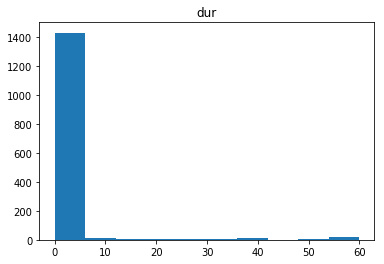

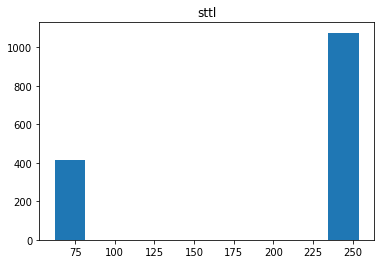

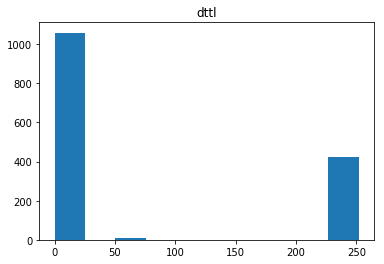

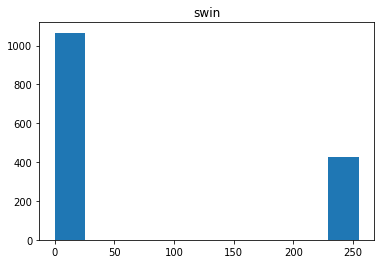

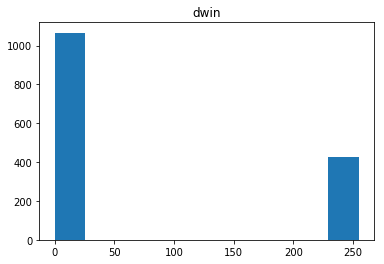

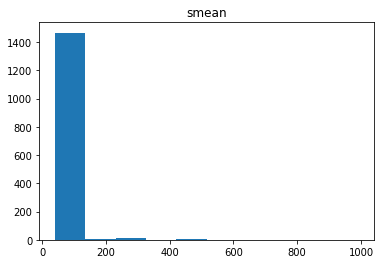

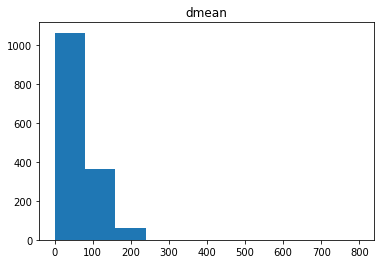

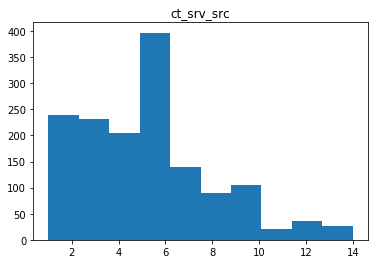

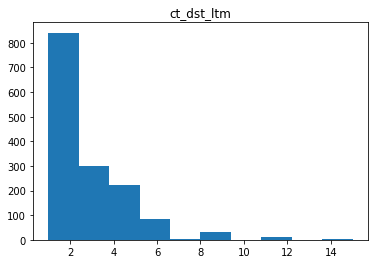

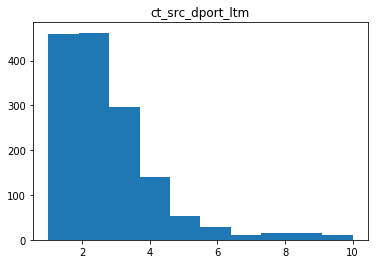

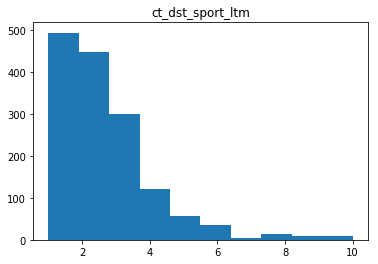

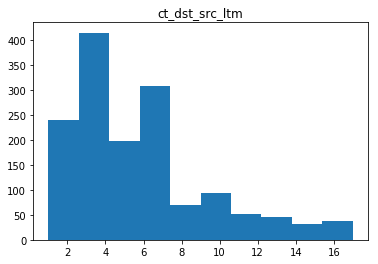

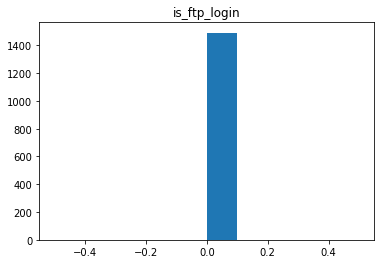

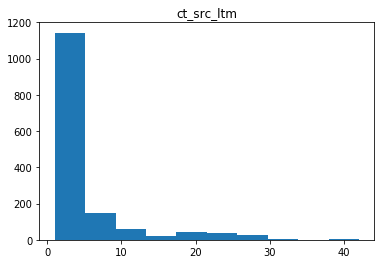

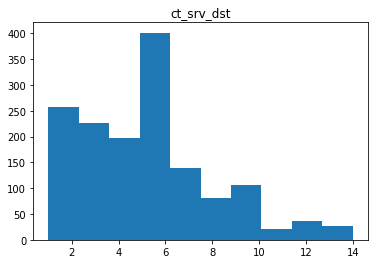

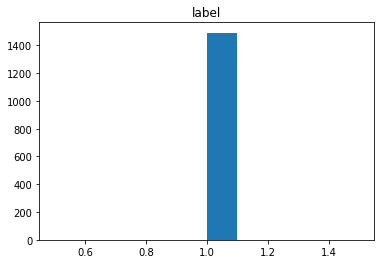

In [58]:
df_analysis = df2[(df2['attack_cat']=='Analysis')]
for colname in df_analysis.columns:
    col = df_analysis[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

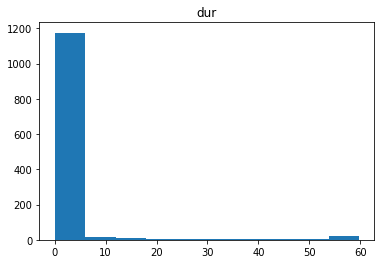

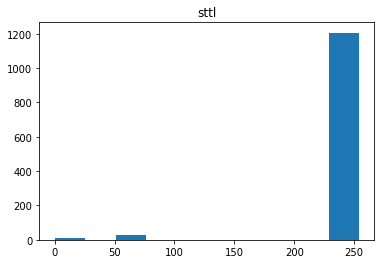

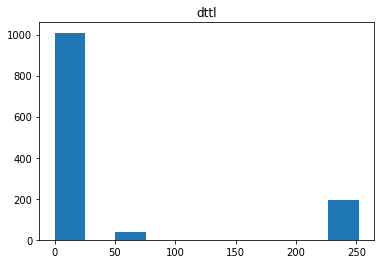

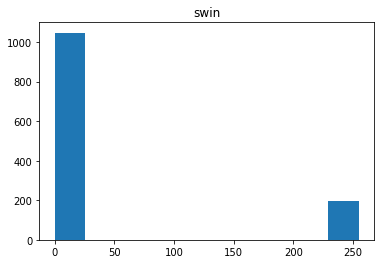

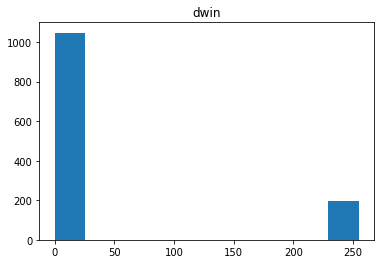

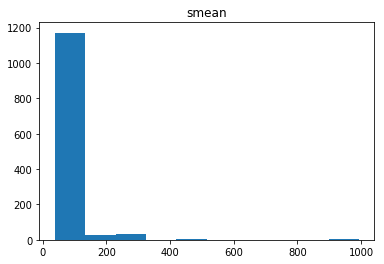

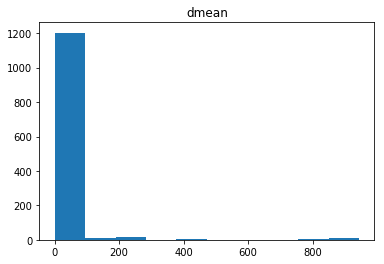

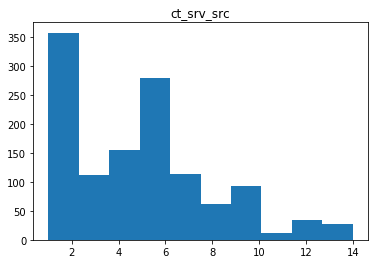

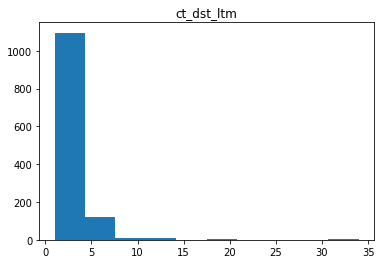

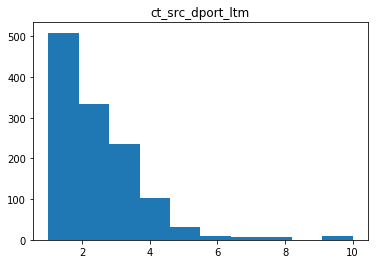

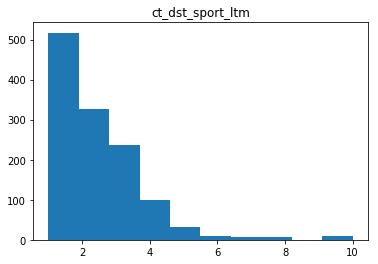

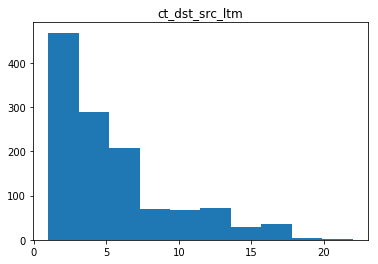

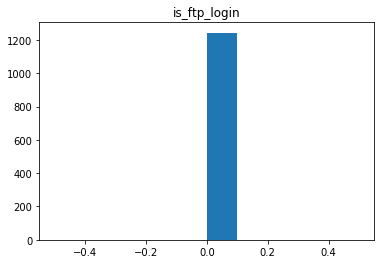

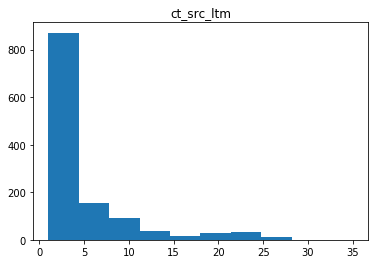

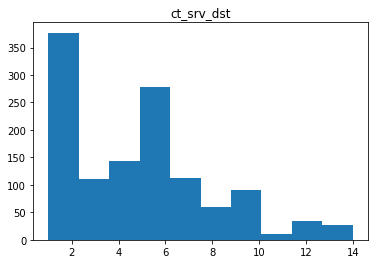

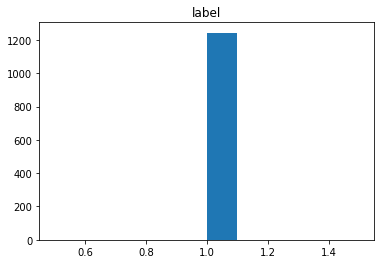

In [52]:
df_back = df2[(df2['attack_cat']=='Backdoor')]
for colname in df_back.columns:
    col = df_back[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

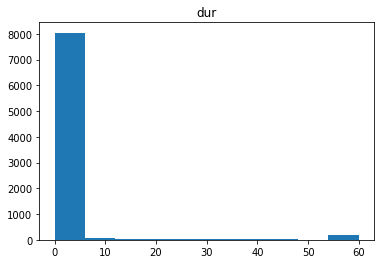

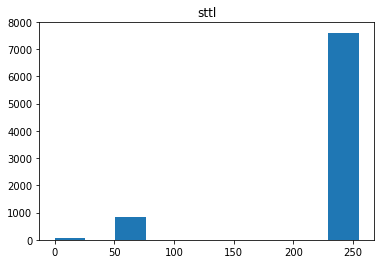

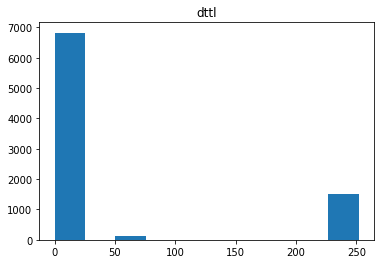

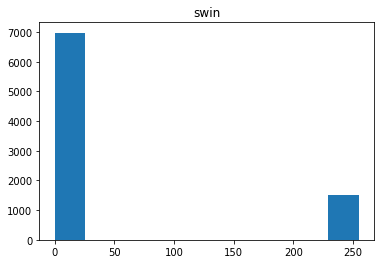

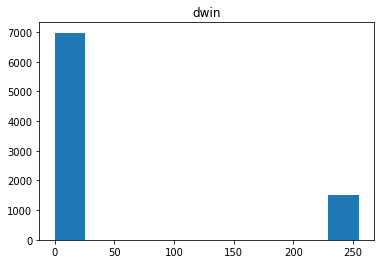

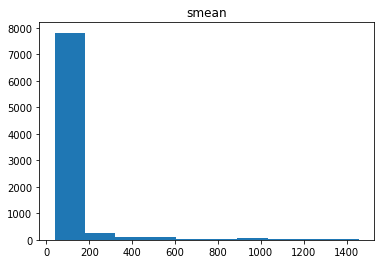

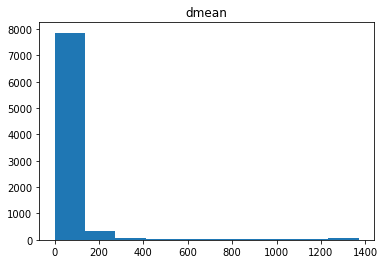

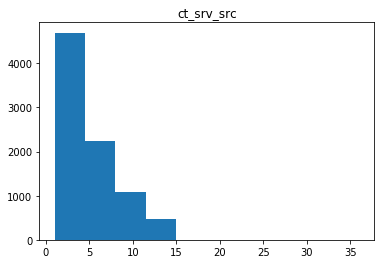

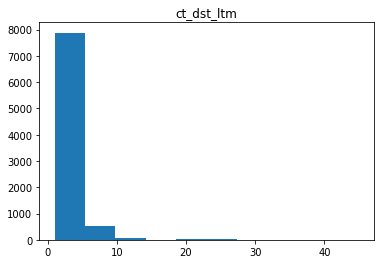

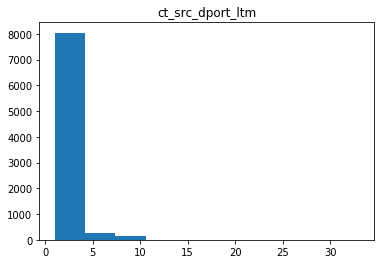

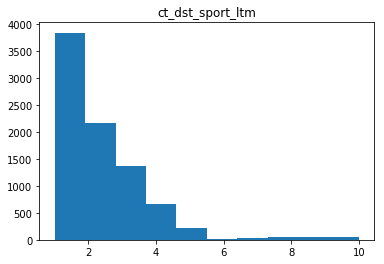

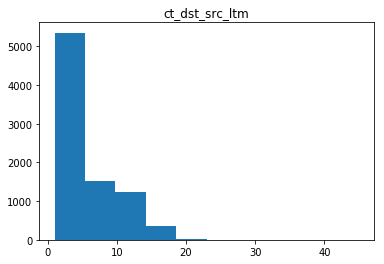

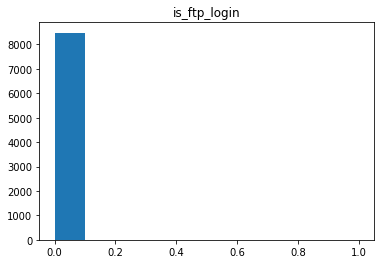

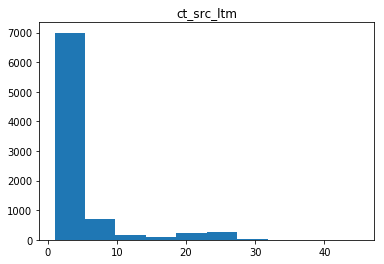

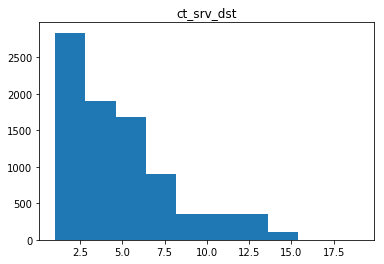

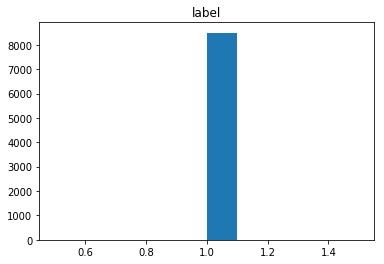

In [53]:
df_Dos = df2[(df2['attack_cat']=='DoS')]
for colname in df_Dos.columns:
    col = df_Dos[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

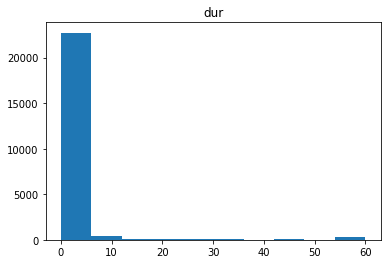

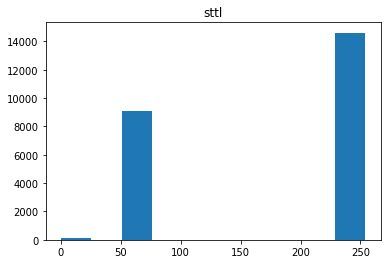

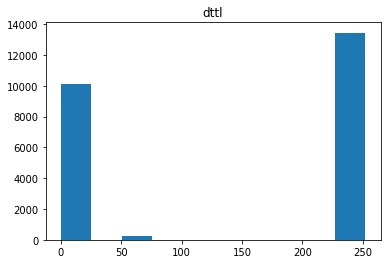

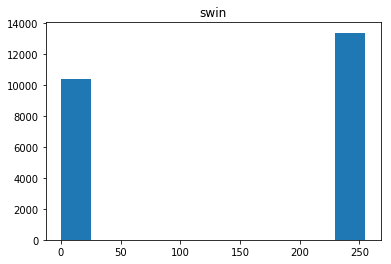

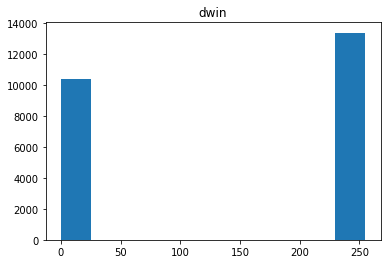

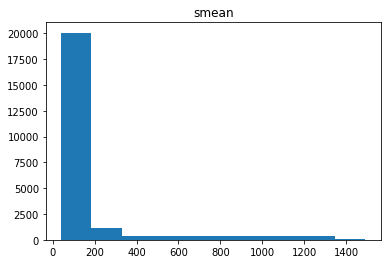

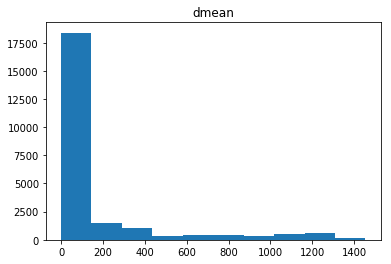

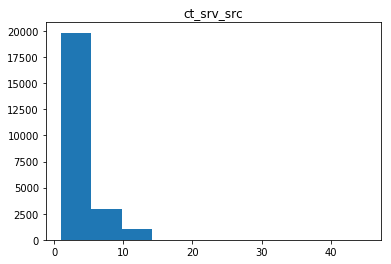

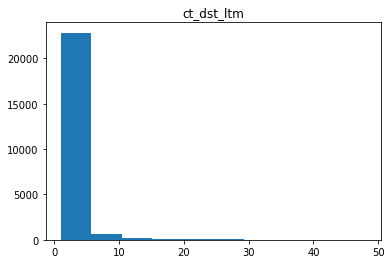

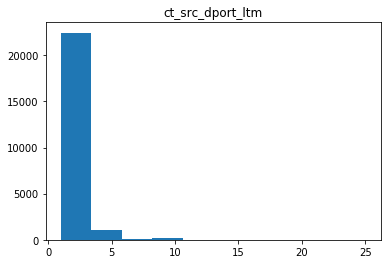

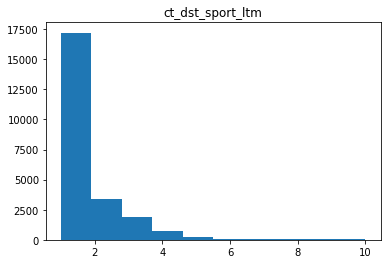

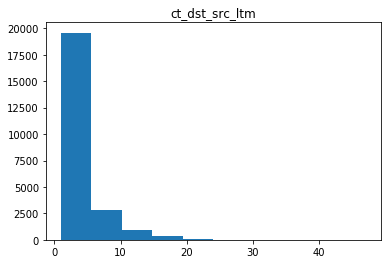

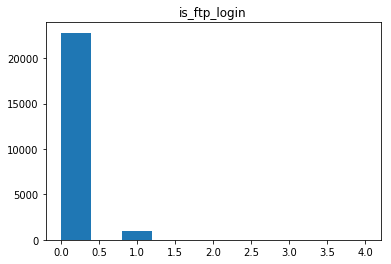

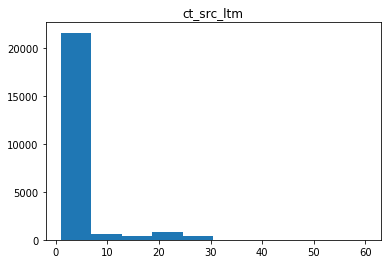

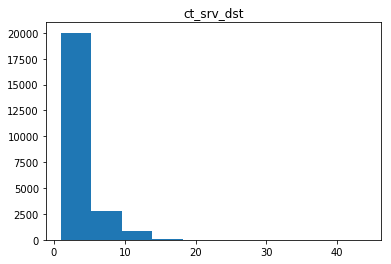

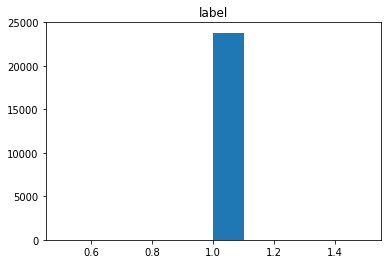

In [54]:
df_exploits = df2[(df2['attack_cat']=='Exploits')]
for colname in df_exploits.columns:
    col = df_exploits[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

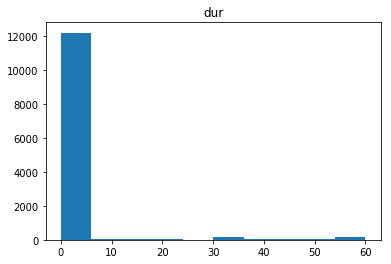

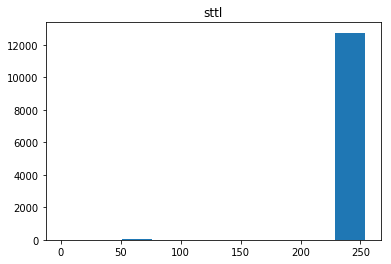

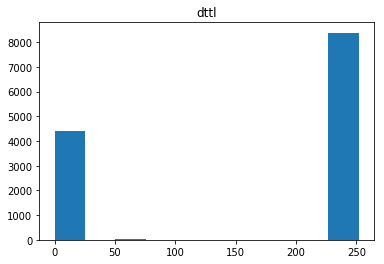

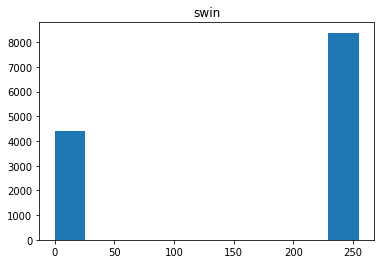

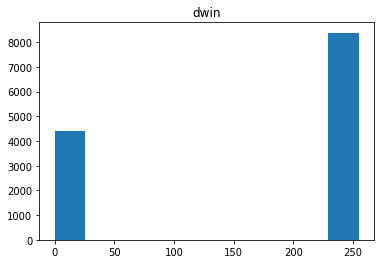

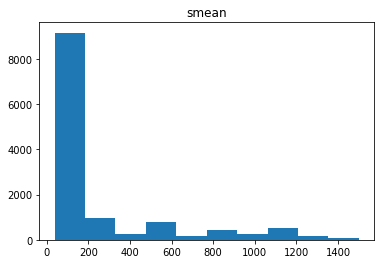

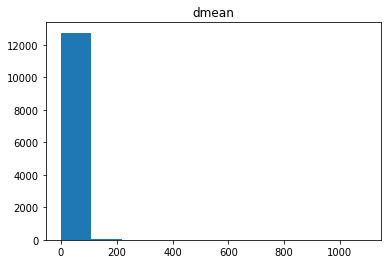

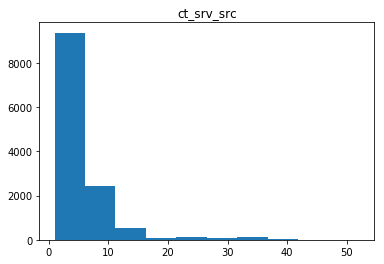

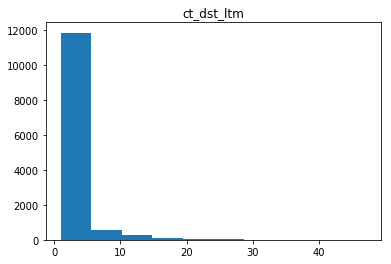

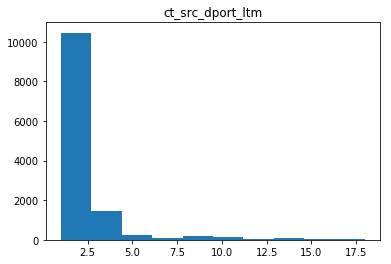

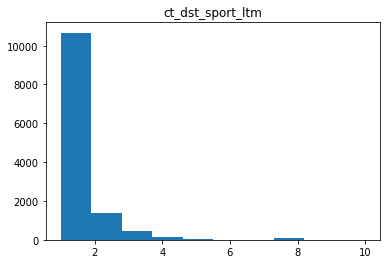

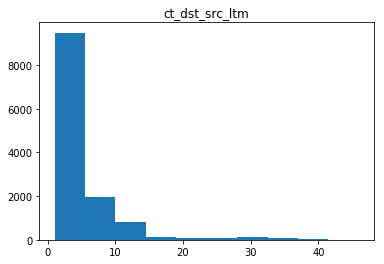

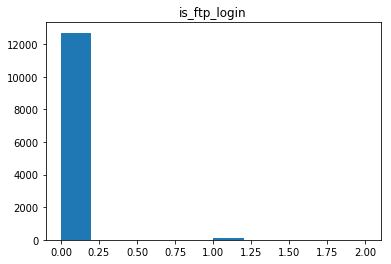

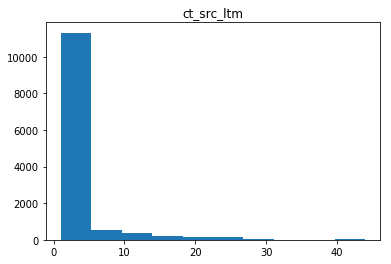

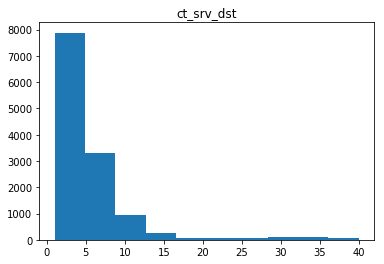

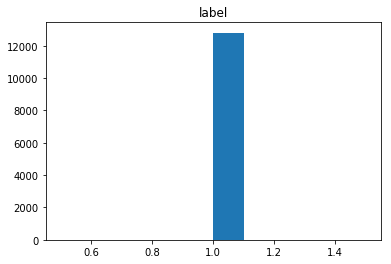

In [55]:
df_fuzzers = df2[(df2['attack_cat']=='Fuzzers')]
for colname in df_fuzzers.columns:
    col = df_fuzzers[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

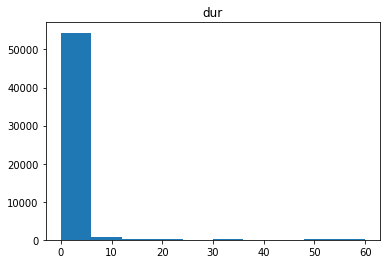

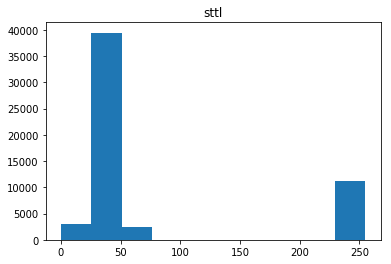

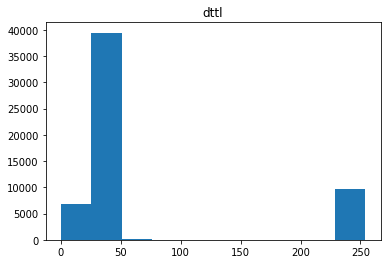

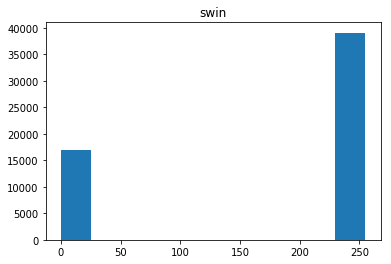

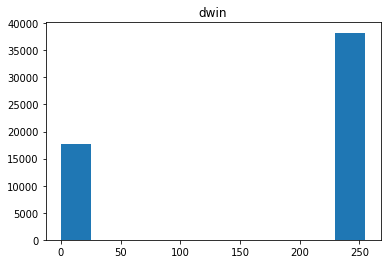

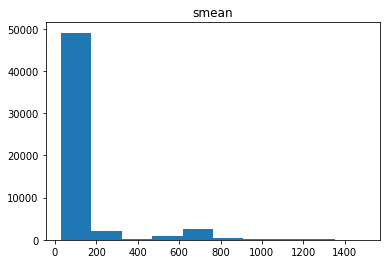

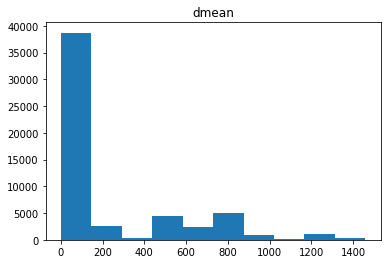

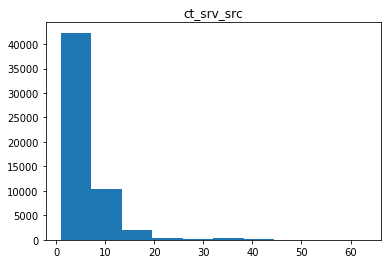

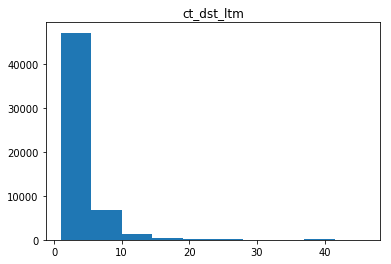

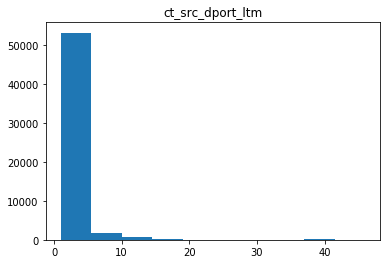

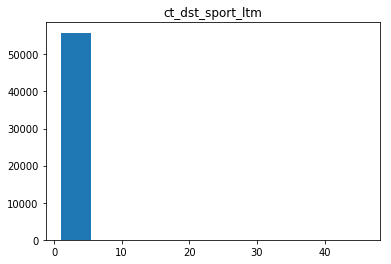

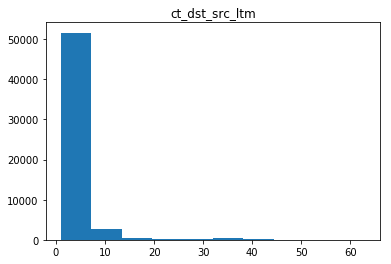

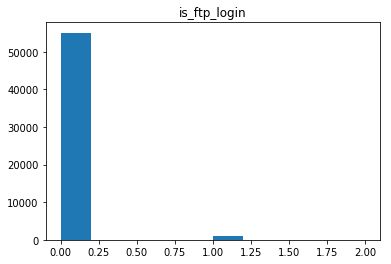

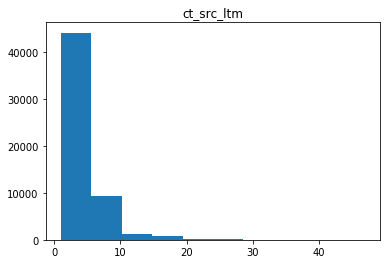

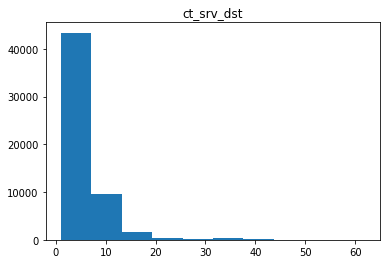

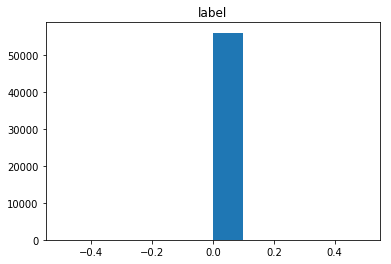

In [56]:
df_normal = df2[(df2['attack_cat']=='Normal')]
for colname in df_normal.columns:
    col = df_normal[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

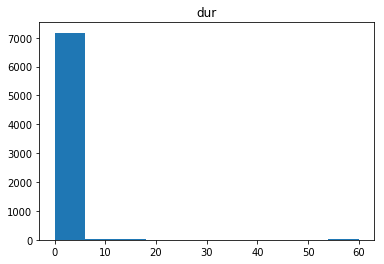

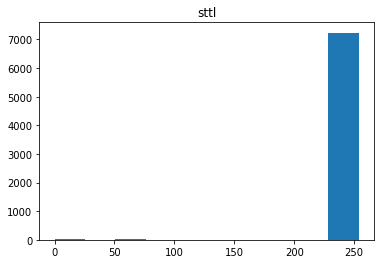

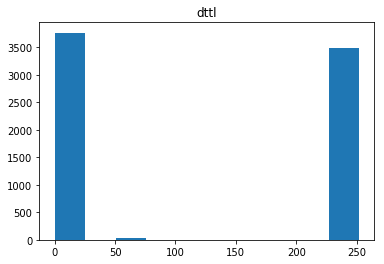

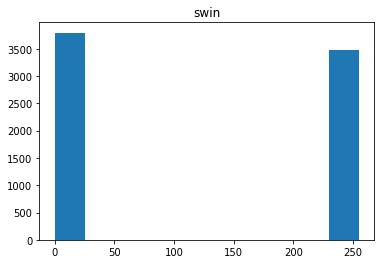

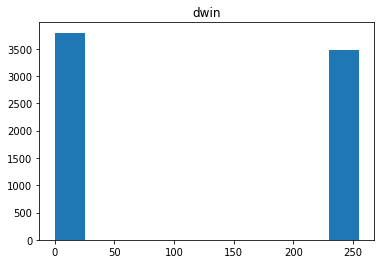

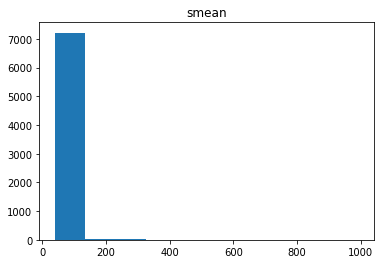

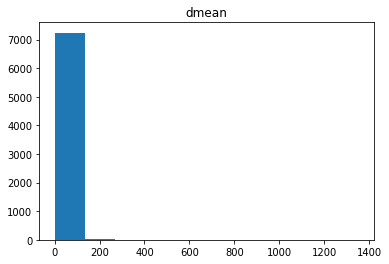

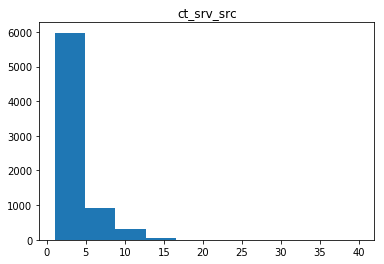

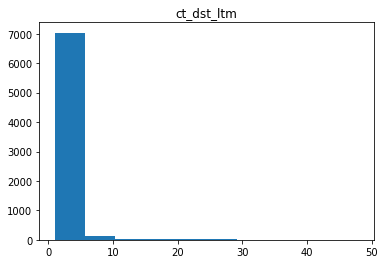

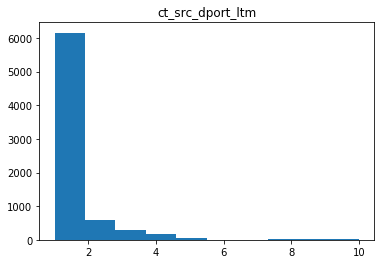

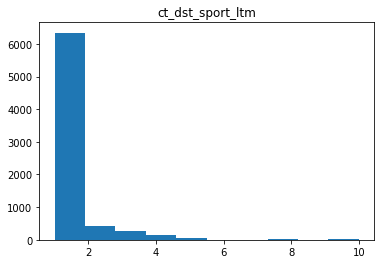

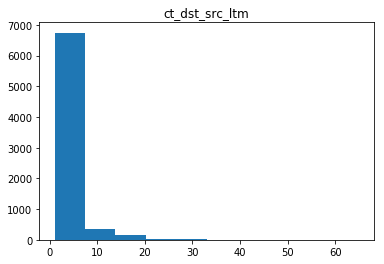

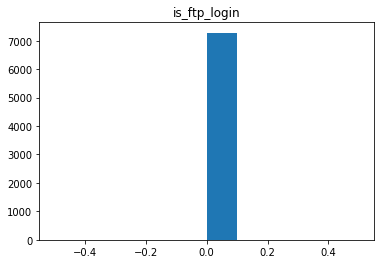

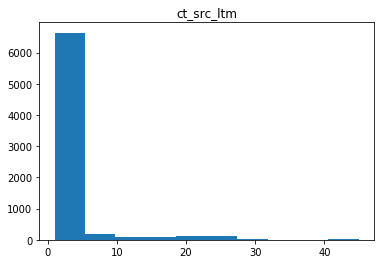

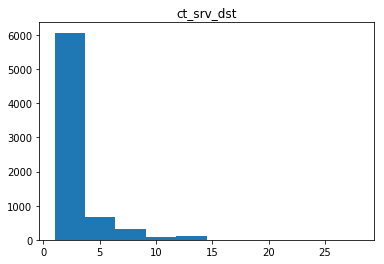

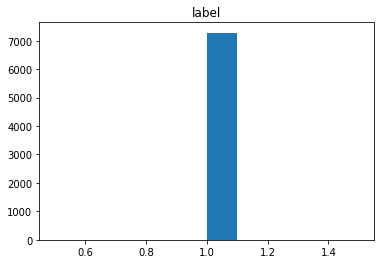

In [59]:
df_reco = df2[(df2['attack_cat']=='Reconnaissance')]
for colname in df_reco.columns:
    col = df_reco[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

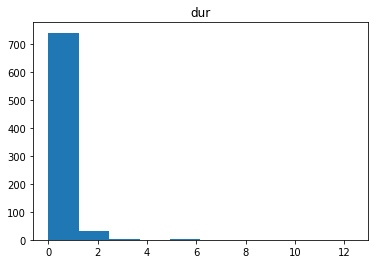

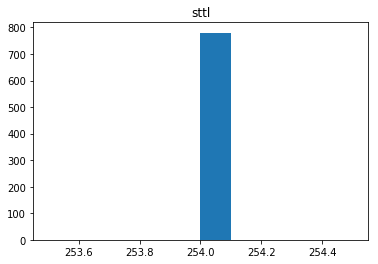

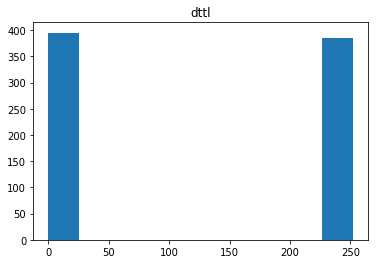

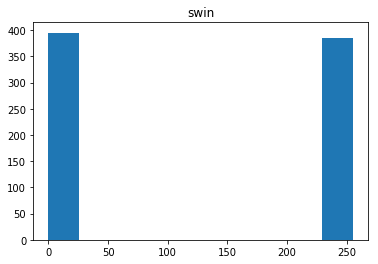

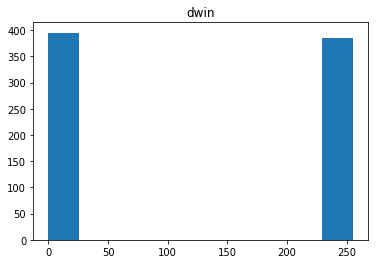

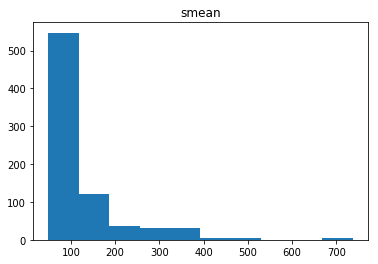

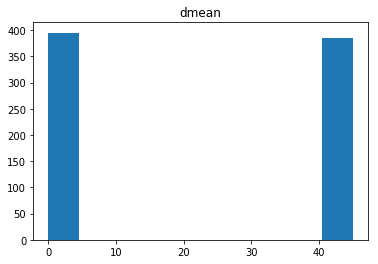

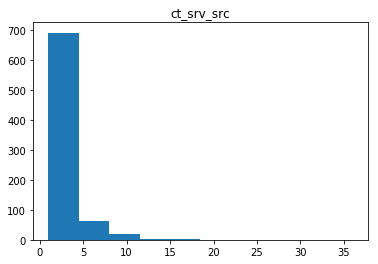

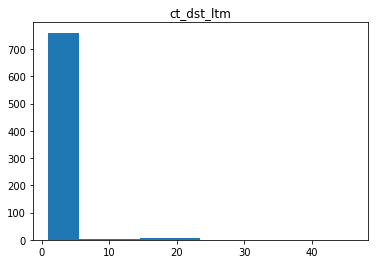

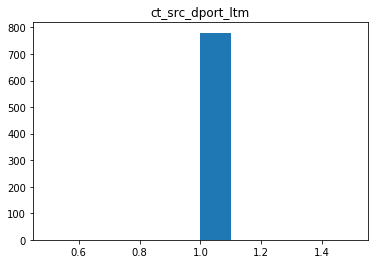

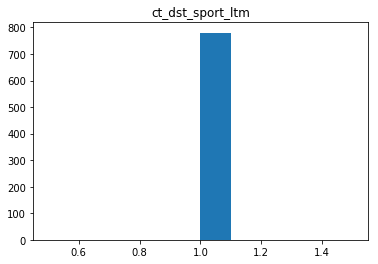

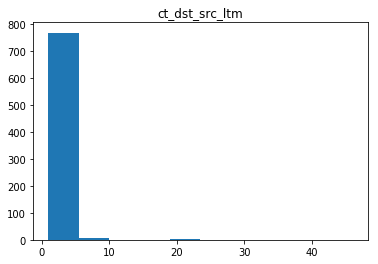

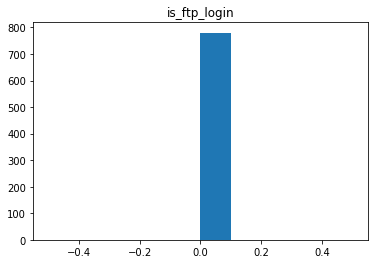

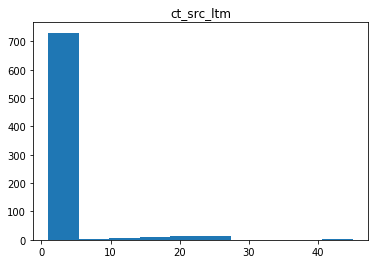

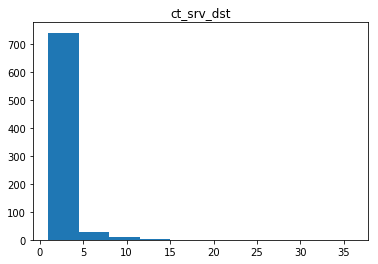

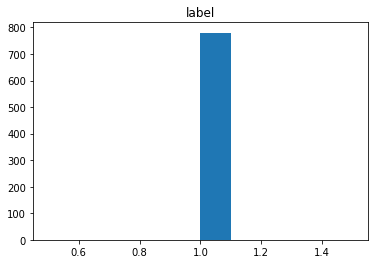

In [60]:
df_shell = df2[(df2['attack_cat']=='Shellcode')]
for colname in df_shell.columns:
    col = df_shell[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

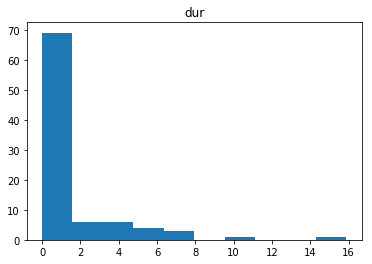

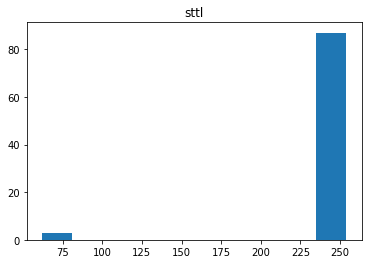

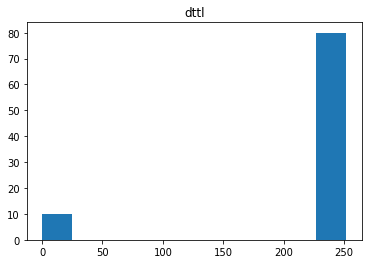

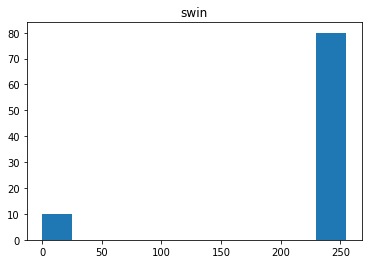

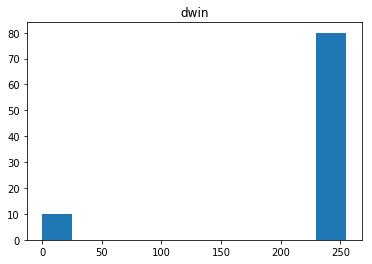

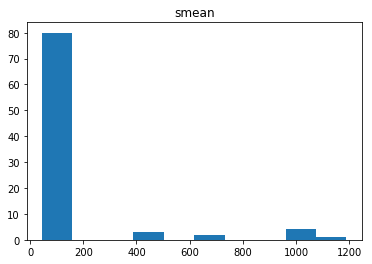

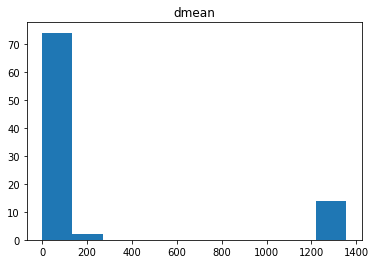

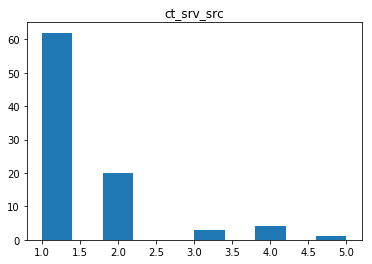

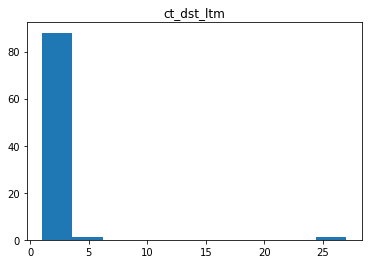

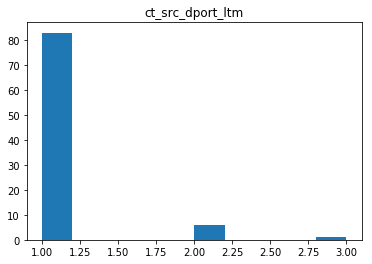

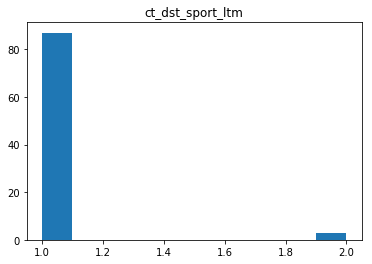

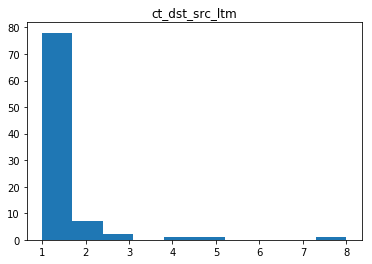

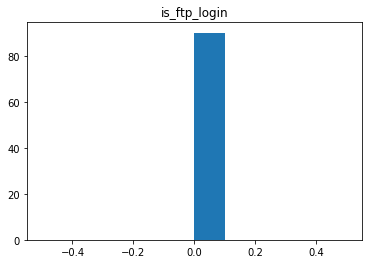

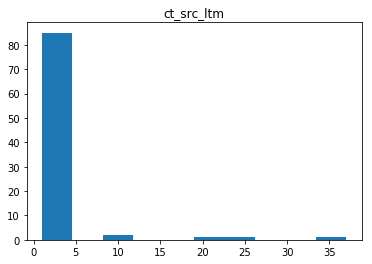

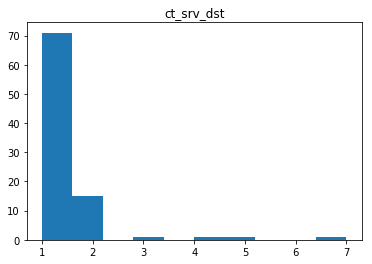

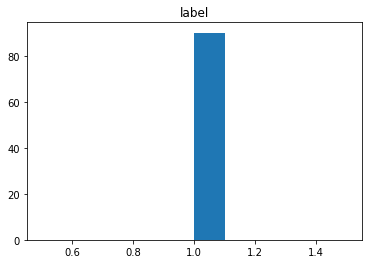

In [61]:
df_worms = df2[(df2['attack_cat']=='Worms')]
for colname in df_worms.columns:
    col = df_worms[colname]
    
    if col.dtypes in ['int64','float64']:
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [50]:
dfgroup_attack_mean = df2.groupby('attack_cat').mean()
dfgroup_attack_mean

,dur,sttl,dttl,swin,dwin,smean,dmean,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_src_ltm,ct_srv_dst,label
attack_cat,,,,,,,,,,,,,,,,
Analysis,1.847034,200.559356,72.112676,72.686117,72.686117,98.164319,40.824950,5.194500,2.742455,2.482897,2.410463,5.701543,0.000000,5.192488,5.160295,1.0
Backdoor,2.083074,247.835881,41.570394,40.209171,40.209171,102.822204,22.154465,4.798874,2.555109,2.172164,2.161706,5.340306,0.000000,4.814159,4.706356,1.0
DoS,2.172714,233.537972,46.215472,45.487460,45.487460,133.439656,43.005298,4.658307,2.523843,2.138702,2.112917,5.368303,0.001413,4.367715,4.566937,1.0
Exploits,1.937881,179.560035,143.032380,143.505103,143.505103,180.580656,163.915795,2.982781,2.066272,1.574356,1.537231,3.335601,0.043803,3.513586,2.812734,1.0
Fuzzers,2.559712,253.107555,165.029035,166.908367,166.908367,245.408523,39.784655,5.755620,2.440134,2.064315,1.296987,5.051826,0.008117,3.397206,5.158367,1.0
Normal,1.017177,75.445982,64.276304,178.112554,174.218375,139.978000,253.067393,5.727304,3.491571,1.793804,1.190304,3.870000,0.016982,4.061857,5.519696,0.0
Reconnaissance,0.954550,252.650549,120.839011,122.105769,122.105769,79.420192,23.769505,2.700137,1.743681,1.296429,1.266621,2.397802,0.000000,2.967033,2.159753,1.0
Shellcode,0.341602,254.000000,124.384615,125.865385,125.865385,121.265385,22.051282,2.275641,1.656410,1.000000,1.000000,1.380769,0.000000,2.623077,1.606410,1.0
Worms,1.529484,247.600000,224.000000,226.666667,226.666667,181.555556,241.022222,1.466667,1.533333,1.088889,1.033333,1.277778,0.000000,2.611111,1.333333,1.0


#### df2 features 중 상대적으로 평균값이 큰 'dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean'을 따로 데이터프레임으로 만들어 그래프 확인

In [73]:
df3 = sameratio[['dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'attack_cat']]
df3

,dur,sttl,dttl,swin,dwin,smean,dmean,attack_cat
0,0.000009,254,0,0,0,100,0,Backdoor
1,0.000009,254,0,0,0,100,0,Backdoor
2,0.000009,254,0,0,0,100,0,Backdoor
3,0.000003,254,0,0,0,100,0,Backdoor
4,0.000008,254,0,0,0,100,0,Backdoor
5,0.000005,254,0,0,0,100,0,Backdoor
6,0.000008,254,0,0,0,100,0,Backdoor
7,0.000005,254,0,0,0,100,0,Backdoor
8,0.000008,254,0,0,0,100,0,Backdoor
9,0.000002,254,0,0,0,100,0,Backdoor


In [74]:
df3group_attack_mean = df3.groupby('attack_cat').mean()
df3group_attack_mean

,dur,sttl,dttl,swin,dwin,smean,dmean
attack_cat,,,,,,,
Analysis,1.847034,200.559356,72.112676,72.686117,72.686117,98.164319,40.824950
Backdoor,2.083074,247.835881,41.570394,40.209171,40.209171,102.822204,22.154465
DoS,2.172714,233.537972,46.215472,45.487460,45.487460,133.439656,43.005298
Exploits,1.937881,179.560035,143.032380,143.505103,143.505103,180.580656,163.915795
Fuzzers,2.559712,253.107555,165.029035,166.908367,166.908367,245.408523,39.784655
Normal,1.017177,75.445982,64.276304,178.112554,174.218375,139.978000,253.067393
Reconnaissance,0.954550,252.650549,120.839011,122.105769,122.105769,79.420192,23.769505
Shellcode,0.341602,254.000000,124.384615,125.865385,125.865385,121.265385,22.051282
Worms,1.529484,247.600000,224.000000,226.666667,226.666667,181.555556,241.022222


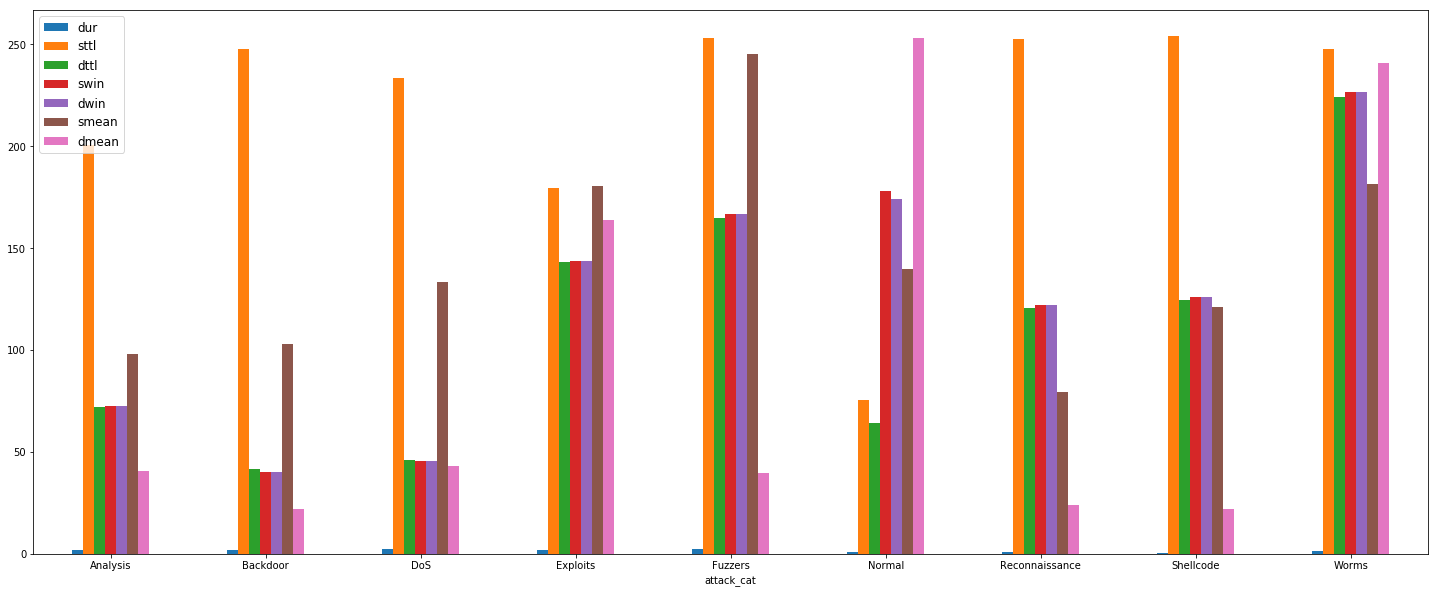

In [75]:
df3group_attack_mean.plot(kind='bar', rot=0, figsize=(25, 10))
plt.legend(fontsize='12')
plt.show()

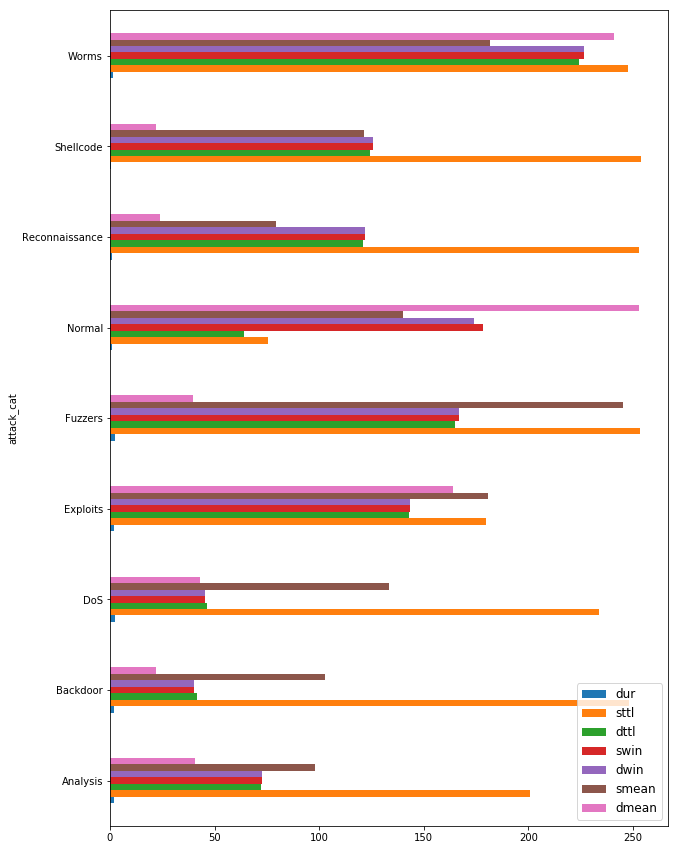

In [77]:
df3group_attack_mean.plot(kind='barh', rot=0, figsize=(10, 15))
plt.legend(fontsize='12')
plt.show()

- benign(Normal)인 경우 dmean(Mean of the ?ow packet size transmitted by the dst)의 평균값이 가장 높게 나타났고, sttl(src -> dst TTL)의 평균값이 모든 공격들의 sttl 평균값보다 작았다
- 다른 anomaly(attack)의 경우 sttl(src -> dst TTL)의 평균값이 공통적으로 높게 나타났다
- Worms를 제외한 나머지 공격은 Normal에서 높게 나타나는 dmean의 평균값이 낮았지만, Worms는 dmean 평균값이 Normal과 비슷하게 높게 나타났다

#### df2 features 중 상대적으로 평균값이 큰 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm', 'ct_srv_dst'을 따로 데이터프레임으로 만들어 그래프 확인

In [96]:
df4 = sameratio[[ 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'attack_cat']]
df4

,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat
0,4,1,1,1,4,2,4,Backdoor
1,7,2,2,2,7,2,7,Backdoor
2,6,1,1,1,6,1,6,Backdoor
3,6,2,2,2,7,2,6,Backdoor
4,4,1,1,1,4,11,4,Backdoor
5,3,2,2,2,4,19,3,Backdoor
6,6,2,2,2,6,11,6,Backdoor
7,5,2,1,1,5,9,5,Backdoor
8,6,2,2,2,7,2,6,Backdoor
9,6,2,2,2,7,2,6,Backdoor


In [97]:
df4group_attack_mean = df4.groupby('attack_cat').mean()
df4group_attack_mean

,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
attack_cat,,,,,,,
Analysis,5.194500,2.742455,2.482897,2.410463,5.701543,5.192488,5.160295
Backdoor,4.798874,2.555109,2.172164,2.161706,5.340306,4.814159,4.706356
DoS,4.658307,2.523843,2.138702,2.112917,5.368303,4.367715,4.566937
Exploits,2.982781,2.066272,1.574356,1.537231,3.335601,3.513586,2.812734
Fuzzers,5.755620,2.440134,2.064315,1.296987,5.051826,3.397206,5.158367
Normal,5.727304,3.491571,1.793804,1.190304,3.870000,4.061857,5.519696
Reconnaissance,2.700137,1.743681,1.296429,1.266621,2.397802,2.967033,2.159753
Shellcode,2.275641,1.656410,1.000000,1.000000,1.380769,2.623077,1.606410
Worms,1.466667,1.533333,1.088889,1.033333,1.277778,2.611111,1.333333


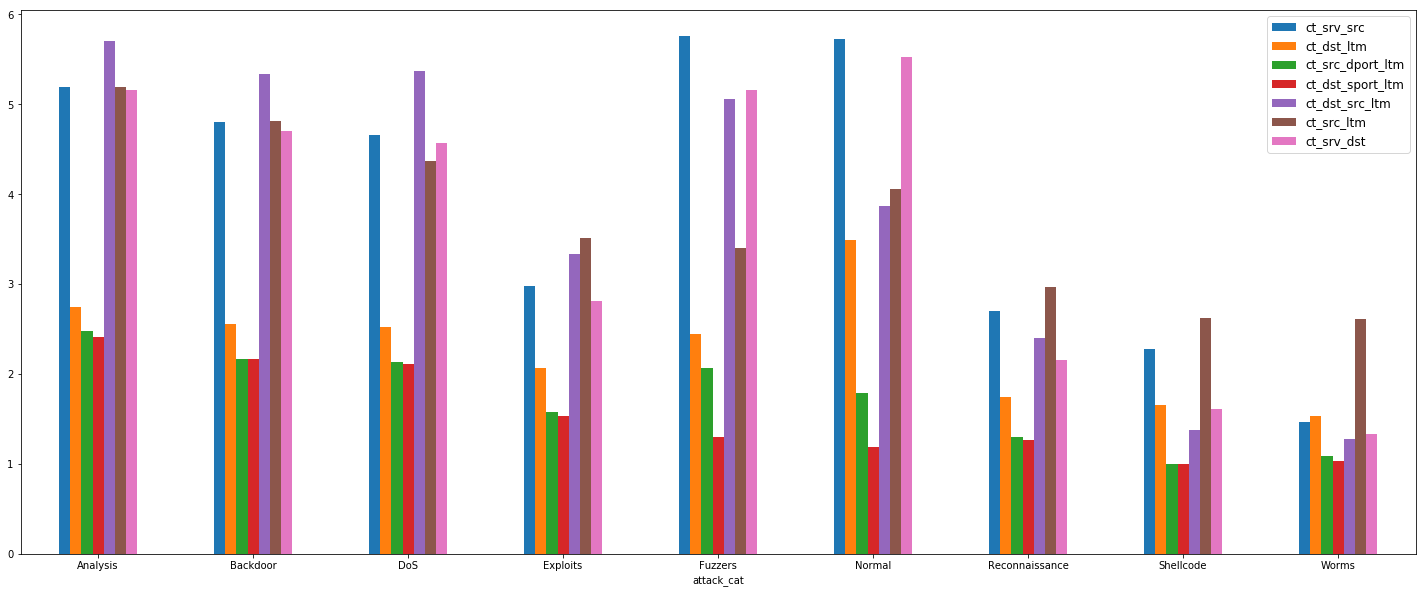

In [98]:
df4group_attack_mean.plot(kind='bar', rot=0, figsize=(25, 10))
plt.legend(fontsize='12')
plt.show()

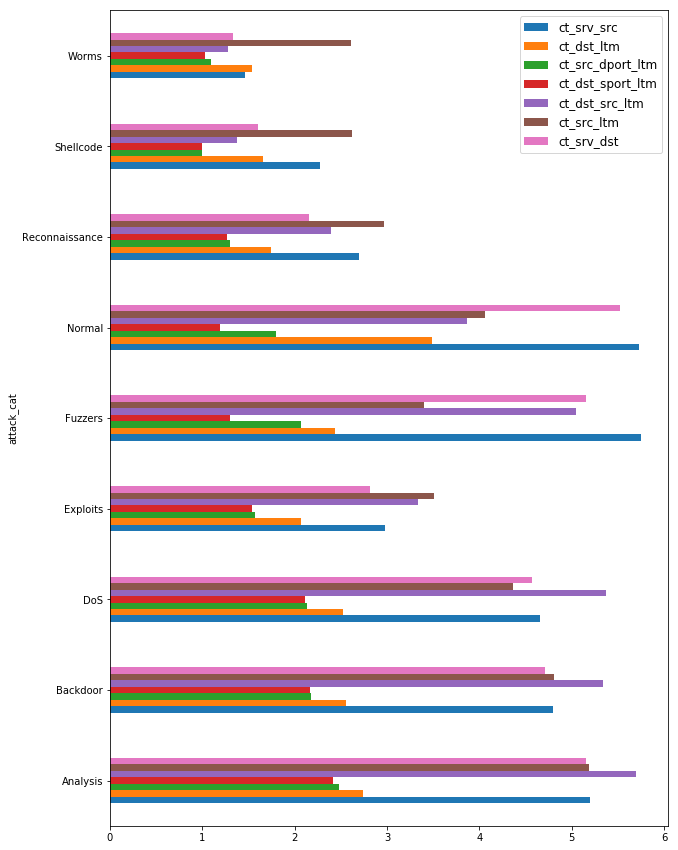

In [99]:
df4group_attack_mean.plot(kind='barh', rot=0, figsize=(10, 15))
plt.legend(fontsize='12')
plt.show()

- benign(Normal)의 경우 ct_dst_ltm(100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수)와 ct_srv_dst(100개의 연결 동안 동일한 서비스와 dst 주소를 포함하는 연결 수)의 평균값이 가장 높았다

In [82]:
df5 = sameratio[['dur', 'sttl', 'dttl', 'swin', 'dwin', 'smean', 'dmean', 'label']]
df5

,dur,sttl,dttl,swin,dwin,smean,dmean,label
0,0.000009,254,0,0,0,100,0,1
1,0.000009,254,0,0,0,100,0,1
2,0.000009,254,0,0,0,100,0,1
3,0.000003,254,0,0,0,100,0,1
4,0.000008,254,0,0,0,100,0,1
5,0.000005,254,0,0,0,100,0,1
6,0.000008,254,0,0,0,100,0,1
7,0.000005,254,0,0,0,100,0,1
8,0.000008,254,0,0,0,100,0,1
9,0.000002,254,0,0,0,100,0,1


In [83]:
df5group_attack_mean = df5.groupby('label').mean()
df5group_attack_mean

,dur,sttl,dttl,swin,dwin,smean,dmean
label,,,,,,,
0,1.017177,75.445982,64.276304,178.112554,174.218375,139.978000,253.067393
1,1.965842,217.295536,126.226500,126.921696,126.921696,170.367143,90.684036


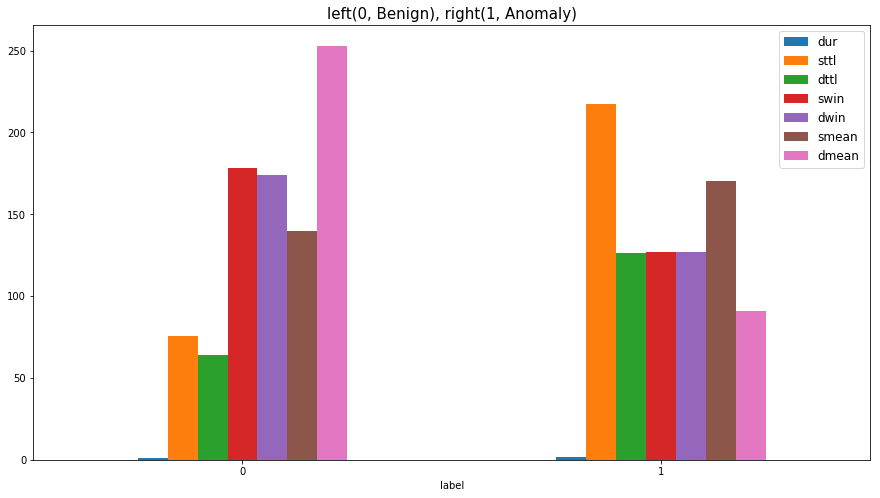

In [101]:
df5group_attack_mean.plot(kind='bar', rot=0, figsize=(15, 8))
plt.title('left(0, Benign), right(1, Anomaly)', fontsize=15)
plt.legend(fontsize='12')
plt.show()

##### benign > anomaly
- swin: Source TCP window advertisement value
- dwin: Destination TCP window advertisement value
- dmean: Mean of the ?ow packet size transmitted by the dst

##### benign < anomaly
- sttl: src -> dst TTL
- dttl: dst -> src TTL
- smean: Mean of the ?ow packet size transmitted by the src

#### -> anomaly의 경우 TTL 평균값이 benign보다 높다

In [93]:
df6 = sameratio[[ 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'label']]
df6

,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
0,4,1,1,1,4,2,4,1
1,7,2,2,2,7,2,7,1
2,6,1,1,1,6,1,6,1
3,6,2,2,2,7,2,6,1
4,4,1,1,1,4,11,4,1
5,3,2,2,2,4,19,3,1
6,6,2,2,2,6,11,6,1
7,5,2,1,1,5,9,5,1
8,6,2,2,2,7,2,6,1
9,6,2,2,2,7,2,6,1


In [94]:
df6group_attack_mean = df6.groupby('label').mean()
df6group_attack_mean

,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
label,,,,,,,
0,5.727304,3.491571,1.793804,1.190304,3.870000,4.061857,5.519696
1,3.921446,2.201554,1.764589,1.563214,3.991571,3.605161,3.615893


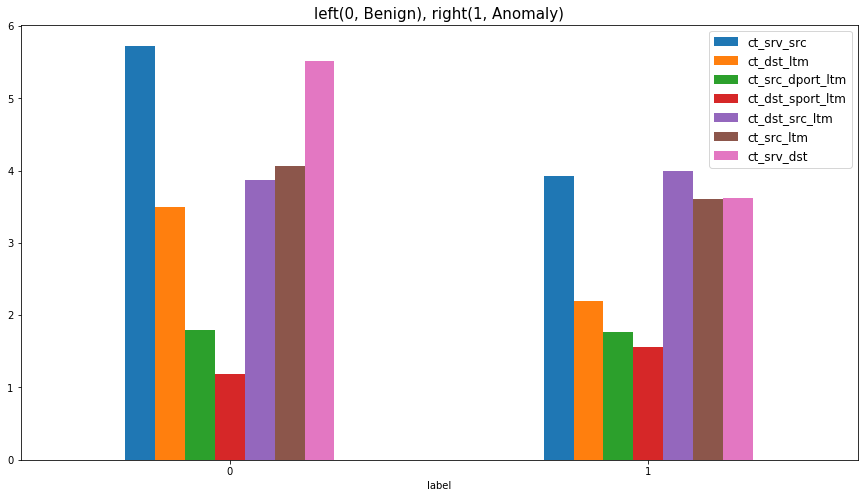

In [102]:
df6group_attack_mean.plot(kind='bar', rot=0, figsize=(15, 8))
plt.title('left(0, Benign), right(1, Anomaly)', fontsize=15)
plt.legend(fontsize='12')
plt.show()

##### benign > anomaly
- ct_srv_src: 100개의 연결 동안 동일한 서비스와 src 주소를 포함하는 연결 수
- ct_srv_dst: 100개의 연결 동안 동일한 서비스와 dst 주소를 포함하는 연결 수
- ct_dst_ltm: 100개의 연결 동안 동일한 dst 주소를 포함하는 연결 수
- ct_src_ltm: 100개의 연결 동안 동일한 src 주소를 포함하는 연결 수

##### benign < anomaly
- ct_dst_sport_ltm: 100개의 연결 동안 동일한 dst 주소와 출발지 포트를 포함하는 연결 수
- ct_dst_src_ltm: 100개의 연결 동안 동일한 src와 dst 주소를 포함하는 연결 수